# Исследование объявлений о продаже квартир

В вашем распоряжении данные сервиса Яндекс.Недвижимость — архив объявлений о продаже квартир в Санкт-Петербурге и соседних населённых пунктов за несколько лет. Нужно научиться определять рыночную стоимость объектов недвижимости. Ваша задача — установить параметры. Это позволит построить автоматизированную систему: она отследит аномалии и мошенническую деятельность.

По каждой квартире на продажу доступны два вида данных. Первые вписаны пользователем, вторые — получены автоматически на основе картографических данных. Например, расстояние до центра, аэропорта, ближайшего парка и водоёма.

Описание данных:
- `airports_nearest` — расстояние до ближайшего аэропорта в метрах (м)
- `balcony` — число балконов
- `ceiling_height` — высота потолков (м)
- `cityCenters_nearest` — расстояние до центра города (м)
- `days_exposition` — сколько дней было размещено объявление (от публикации до снятия)
- `first_day_exposition` — дата публикации
- `floor` — этаж
- `floors_total` — всего этажей в доме
- `is_apartment` — апартаменты (булев тип)
- `kitchen_area` — площадь кухни в квадратных метрах (м²)
- `last_price` — цена на момент снятия с публикации
- `living_area` — жилая площадь в квадратных метрах (м²)
- `locality_name` — название населённого пункта
- `open_plan` — свободная планировка (булев тип)
- `parks_around3000` — число парков в радиусе 3 км
- `parks_nearest` — расстояние до ближайшего парка (м)
- `ponds_around3000` — число водоёмов в радиусе 3 км
- `ponds_nearest` — расстояние до ближайшего водоёма (м)
- `rooms` — число комнат
- `studio` — квартира-студия (булев тип)
- `total_area` — общая площадь квартиры в квадратных метрах (м²)
- `total_images` — число фотографий квартиры в объявлении

План работы:
1. Изучить информацию о данных;
2. Выявить и обработать дубликаты, пропущенные значения, аномалии;
3. Добавить новые столбцы с данными;
4. Описать каждый параметр и построить гистограммы;
5. Выполнить поставленные задачи;
6. Подвести итоги.

## Изучение общей информации о данных

In [1]:
import matplotlib.pyplot as plt
import pandas as pd

In [2]:
# Читаем файл с помощью pandas. В качестве разделителя указываем '\t'
data = pd.read_csv('https://code.s3.yandex.net/datasets/real_estate_data.csv', sep='\t')
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23699 entries, 0 to 23698
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   total_images          23699 non-null  int64  
 1   last_price            23699 non-null  float64
 2   total_area            23699 non-null  float64
 3   first_day_exposition  23699 non-null  object 
 4   rooms                 23699 non-null  int64  
 5   ceiling_height        14504 non-null  float64
 6   floors_total          23613 non-null  float64
 7   living_area           21796 non-null  float64
 8   floor                 23699 non-null  int64  
 9   is_apartment          2775 non-null   object 
 10  studio                23699 non-null  bool   
 11  open_plan             23699 non-null  bool   
 12  kitchen_area          21421 non-null  float64
 13  balcony               12180 non-null  float64
 14  locality_name         23650 non-null  object 
 15  airports_nearest   

In [3]:
print('Число явных дубликатов:', data.duplicated().sum())

Число явных дубликатов: 0


Датасет состоит из **22 столбцов**, в 14 имеются пропущенные значения.

In [4]:
pd.set_option('display.max_columns', 50)
data.head(10)

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,studio,open_plan,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
0,20,13000000.0,108.00,2019-03-07T00:00:00,3,2.70,16.0,51.00,8,NaN,False,False,25.00,NaN,Санкт-Петербург,18863.0,16028.0,1.0,482.0,2.0,755.0,NaN
1,7,3350000.0,40.40,2018-12-04T00:00:00,1,NaN,11.0,18.60,1,NaN,False,False,11.00,2.0,посёлок Шушары,12817.0,18603.0,0.0,NaN,0.0,NaN,81.0
2,10,5196000.0,56.00,2015-08-20T00:00:00,2,NaN,5.0,34.30,4,NaN,False,False,8.30,0.0,Санкт-Петербург,21741.0,13933.0,1.0,90.0,2.0,574.0,558.0
3,0,64900000.0,159.00,2015-07-24T00:00:00,3,NaN,14.0,NaN,9,NaN,False,False,NaN,0.0,Санкт-Петербург,28098.0,6800.0,2.0,84.0,3.0,234.0,424.0
4,2,10000000.0,100.00,2018-06-19T00:00:00,2,3.03,14.0,32.00,13,NaN,False,False,41.00,NaN,Санкт-Петербург,31856.0,8098.0,2.0,112.0,1.0,48.0,121.0
5,10,2890000.0,30.40,2018-09-10T00:00:00,1,NaN,12.0,14.40,5,NaN,False,False,9.10,NaN,городской посёлок Янино-1,NaN,NaN,NaN,NaN,NaN,NaN,55.0
6,6,3700000.0,37.30,2017-11-02T00:00:00,1,NaN,26.0,10.60,6,NaN,False,False,14.40,1.0,посёлок Парголово,52996.0,19143.0,0.0,NaN,0.0,NaN,155.0
7,5,7915000.0,71.60,2019-04-18T00:00:00,2,NaN,24.0,NaN,22,NaN,False,False,18.90,2.0,Санкт-Петербург,23982.0,11634.0,0.0,NaN,0.0,NaN,NaN
8,20,2900000.0,33.16,2018-05-23T00:00:00,1,NaN,27.0,15.43,26,NaN,False,False,8.81,NaN,посёлок Мурино,NaN,NaN,NaN,NaN,NaN,NaN,189.0
9,18,5400000.0,61.00,2017-02-26T00:00:00,3,2.50,9.0,43.60,7,NaN,False,False,6.50,2.0,Санкт-Петербург,50898.0,15008.0,0.0,NaN,0.0,NaN,289.0


Получим числовое описание данных и построим гистограммы для каждого столбца

In [5]:
data.describe()

,total_images,last_price,total_area,rooms,ceiling_height,floors_total,living_area,floor,kitchen_area,balcony,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
count,23699.000000,2.369900e+04,23699.000000,23699.000000,14504.000000,23613.000000,21796.000000,23699.000000,21421.000000,12180.000000,18157.000000,18180.000000,18181.000000,8079.000000,18181.000000,9110.000000,20518.000000
mean,9.858475,6.541549e+06,60.348651,2.070636,2.771499,10.673824,34.457852,5.892358,10.569807,1.150082,28793.672193,14191.277833,0.611408,490.804555,0.770255,517.980900,180.888634
std,5.682529,1.088701e+07,35.654083,1.078405,1.261056,6.597173,22.030445,4.885249,5.905438,1.071300,12630.880622,8608.386210,0.802074,342.317995,0.938346,277.720643,219.727988
min,0.000000,1.219000e+04,12.000000,0.000000,1.000000,1.000000,2.000000,1.000000,1.300000,0.000000,0.000000,181.000000,0.000000,1.000000,0.000000,13.000000,1.000000
25%,6.000000,3.400000e+06,40.000000,1.000000,2.520000,5.000000,18.600000,2.000000,7.000000,0.000000,18585.000000,9238.000000,0.000000,288.000000,0.000000,294.000000,45.000000
50%,9.000000,4.650000e+06,52.000000,2.000000,2.650000,9.000000,30.000000,4.000000,9.100000,1.000000,26726.000000,13098.500000,0.000000,455.000000,1.000000,502.000000,95.000000
75%,14.000000,6.800000e+06,69.900000,3.000000,2.800000,16.000000,42.300000,8.000000,12.000000,2.000000,37273.000000,16293.000000,1.000000,612.000000,1.000000,729.000000,232.000000
max,50.000000,7.630000e+08,900.000000,19.000000,100.000000,60.000000,409.700000,33.000000,112.000000,5.000000,84869.000000,65968.000000,3.000000,3190.000000,3.000000,1344.000000,1580.000000


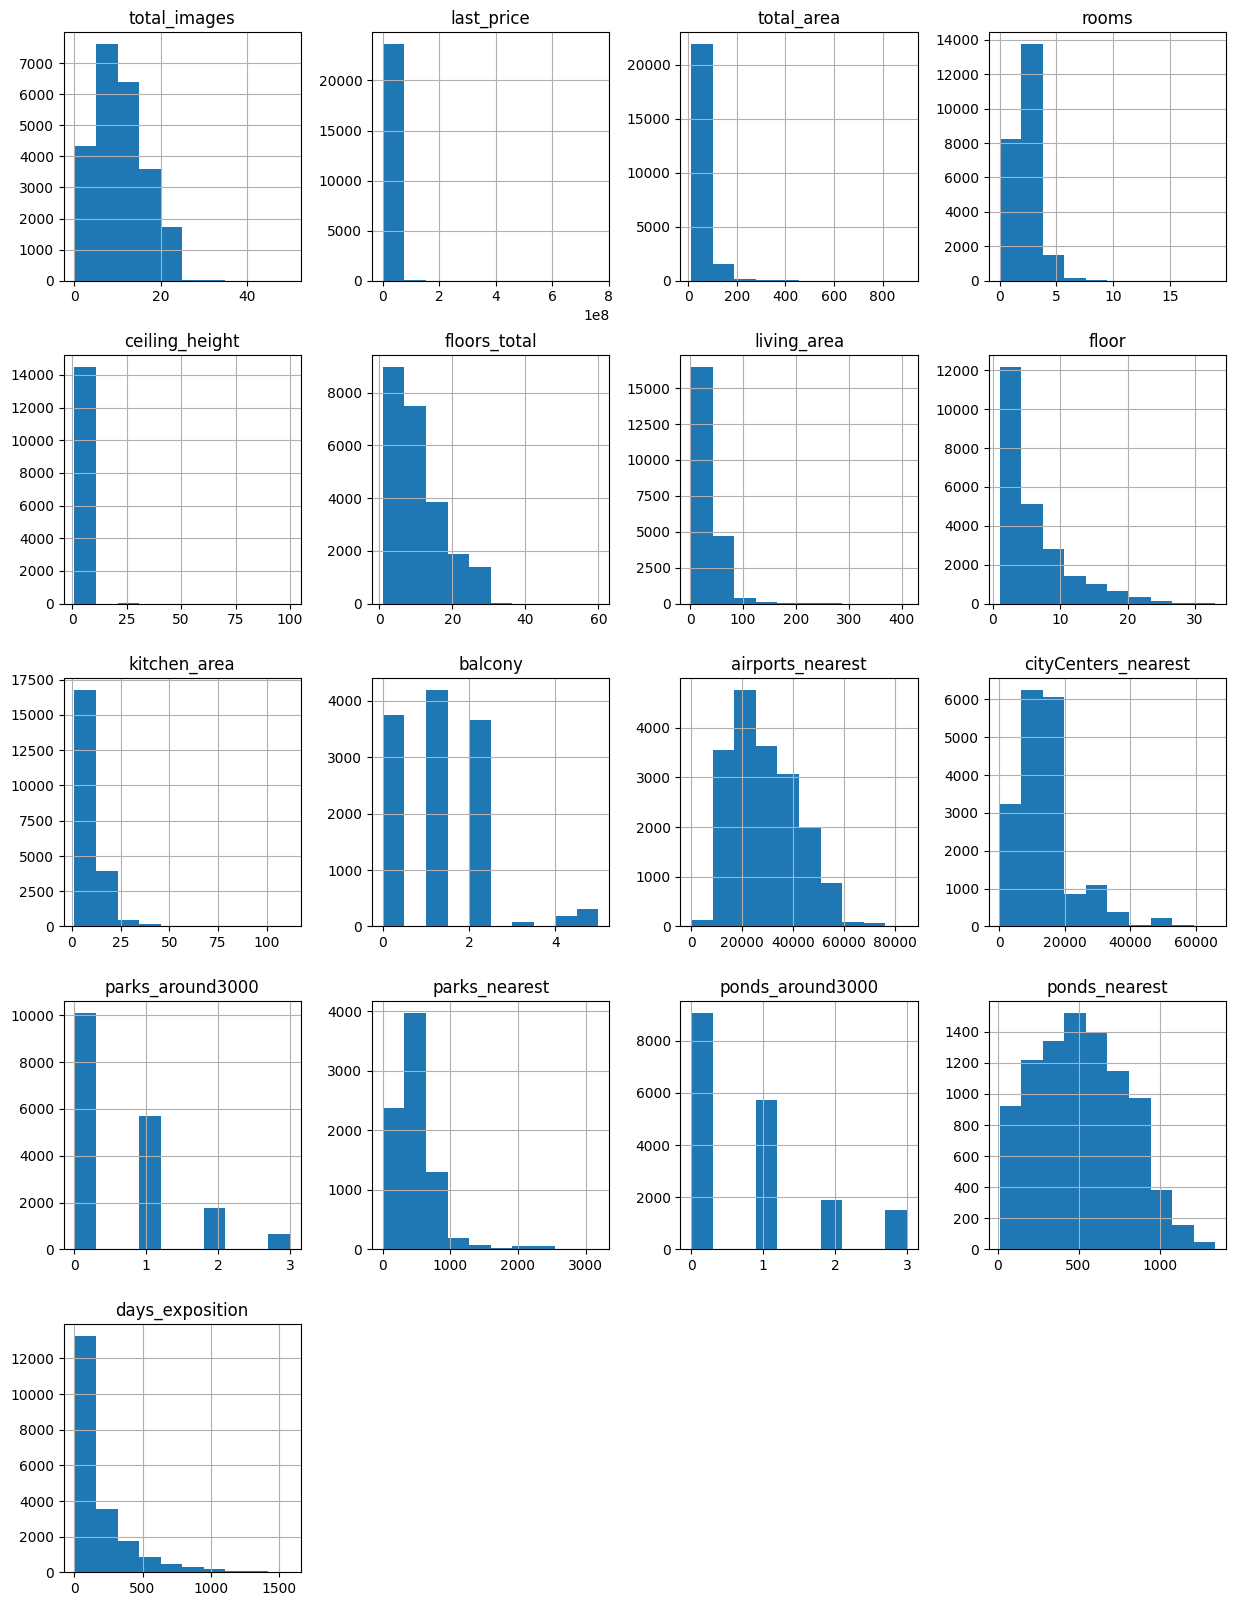

In [6]:
data.hist(figsize=(15, 20))
None

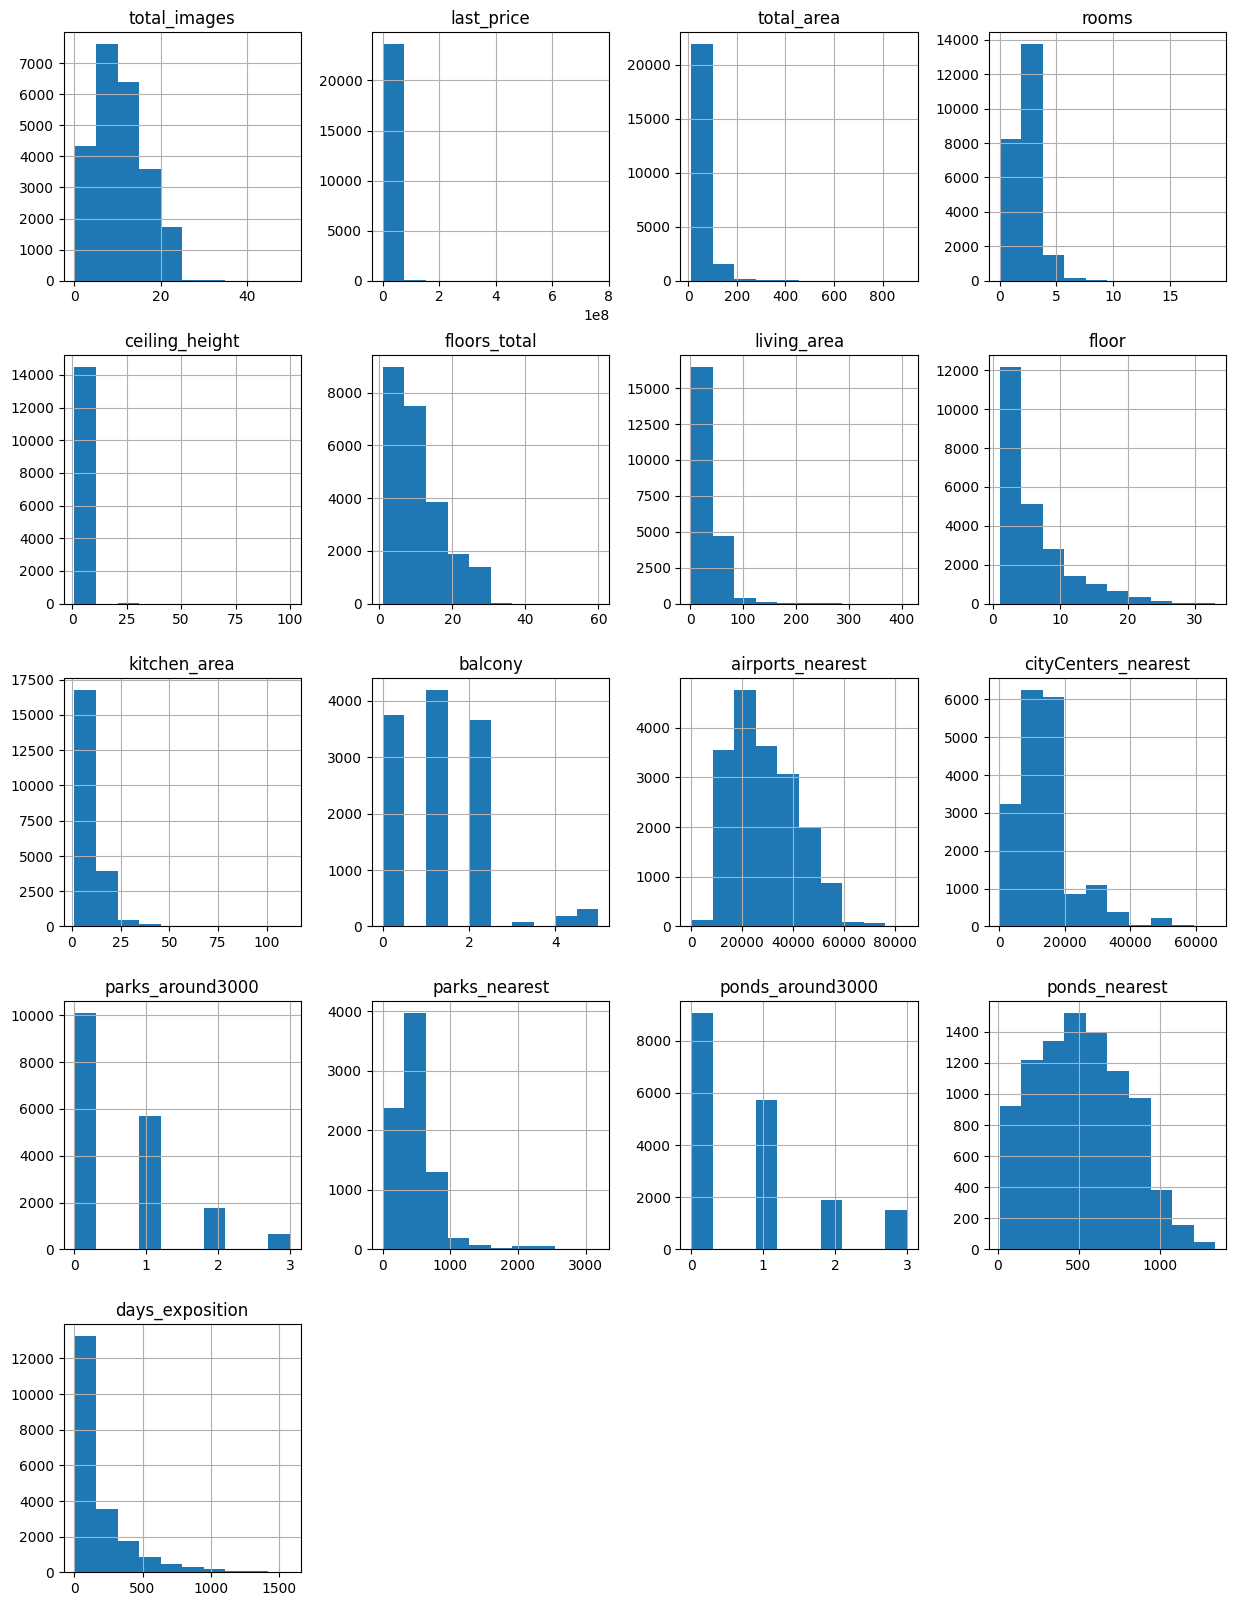

In [7]:
# Код ревьюера

data.hist(figsize=(15, 20))
None

<font size='4'> Выводы по датасету: </font>
1. Датасет состоит из 22 столбцов, в 14 столбцах имеются пропущенные значения;
2. Несоответствие типов данных в `balcony`, `days_exposition`, `floors_total`, `parks_around3000`, `ponds_around3000`;
3. Некорректное названия некоторых столбцов;
4. В `first_day_exposition` время не указывается, только дата;
5. Есть аномальные значения в некоторых столбцах.

## Предобработка данных

Переименуем столбцы

In [8]:
data = data.rename(columns={'cityCenters_nearest': 'city_centers_nearest',
                            'parks_around3000': 'parks_around_3000m',
                            'ponds_around3000': 'ponds_around_3000m',
                            'studio': 'is_studio',
                            'open_plan': 'is_open_plan'
})

### Перевод типов данных и удаление пропусков

Подсчет пропусков

In [9]:
data.isna().sum()

total_images                0
last_price                  0
total_area                  0
first_day_exposition        0
rooms                       0
ceiling_height           9195
floors_total               86
living_area              1903
floor                       0
is_apartment            20924
is_studio                   0
is_open_plan                0
kitchen_area             2278
balcony                 11519
locality_name              49
airports_nearest         5542
city_centers_nearest     5519
parks_around_3000m       5518
parks_nearest           15620
ponds_around_3000m       5518
ponds_nearest           14589
days_exposition          3181
dtype: int64

Выведем в процентном соотношении количество пропусков

In [10]:
((data.isna().sum() / len(data)) * 100).round(1)

total_images             0.0
last_price               0.0
total_area               0.0
first_day_exposition     0.0
rooms                    0.0
ceiling_height          38.8
floors_total             0.4
living_area              8.0
floor                    0.0
is_apartment            88.3
is_studio                0.0
is_open_plan             0.0
kitchen_area             9.6
balcony                 48.6
locality_name            0.2
airports_nearest        23.4
city_centers_nearest    23.3
parks_around_3000m      23.3
parks_nearest           65.9
ponds_around_3000m      23.3
ponds_nearest           61.6
days_exposition         13.4
dtype: float64

Переведем строки `first_day_exposition` в даты

In [11]:
data['first_day_exposition'] = pd.to_datetime(data['first_day_exposition'], format='%Y-%m-%dT00:00:00')

Возможно, в столбце `balcony` пропущены данные из-за того, что люди, не имеющие балкон, пропустили этот пункт, поэтому пропуски заполним нулем и переведем тип в `int`.

Таким же образом заменим пропущенные значения в столбцах `parks_around_3000m` и `ponds_around_3000m` - скорее всего, в радиусе 3 км просто нет парков/прудов, поэтому данные не записаны

In [12]:
data['balcony'] = data['balcony'].fillna(0)
data['parks_around_3000m'] = data['parks_around_3000m'].fillna(0)
data['ponds_around_3000m'] = data['ponds_around_3000m'].fillna(0)

Теперь поменяем типы данных.

Для удобства тип данных в столбце `last_price` можно перевести в `int`.

In [13]:
data['last_price'] = data['last_price'].astype('int')
data['balcony'] = data['balcony'].astype('int')
data['parks_around_3000m'] = data['parks_around_3000m'].astype('int')
data['ponds_around_3000m'] = data['ponds_around_3000m'].astype('int')

Число балконов, парков и прудов удобнее хранить в целочисленном виде, поэтому мы перевели их в `int`.
___
Полагаю, что пропуски в столбце `is_apartment` соответствуют `False` - люди, у которых не апартаменты, пропускали этот пункт. Заменим NaN на False и изменим тип данных на `bool`.

In [14]:
data['is_apartment'] = data['is_apartment'].fillna(False).astype('bool')

В столбцах `floors_total` и `locality_name` количество пропусков незначительно, поэтому удалим их. В `floors_total` изменим тип данных на целочисленный.

In [15]:
data.dropna(subset=['floors_total', 'locality_name'], inplace=True)
# Заодно изменим тип данных на int
data['floors_total'] = data['floors_total'].astype('int')

Уберем аномальные значения `ceiling_height` и заполним пропущенные данные медианным значением

In [16]:
data = data.query('ceiling_height != [1, 100]')
data['ceiling_height'] = data['ceiling_height'].fillna(data['ceiling_height'].median())

<ipython-input-16-3bbdbeec8a9f>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['ceiling_height'] = data['ceiling_height'].fillna(data['ceiling_height'].median())


В `living_area` пропуски появились, скорее всего, из-за неосведомленности людей о площади жилой части. Заполним их, а для точности данных найдем корреляцию среди всех столбцов.

In [17]:
data.select_dtypes(include='number').corr().sort_values(by='living_area', ascending=False)['living_area'].head()

living_area     1.000000
total_area      0.939769
rooms           0.846110
last_price      0.566432
kitchen_area    0.428922
Name: living_area, dtype: float64

Высокая корреляция между жилой площадью и количеством комнат. По столбцу `total_area` заполнить мы не сможем, т.к. значения в нем не категориальные.

Заполним медианы по категориям - количеству комнат

In [18]:
for i in data['rooms'].unique():
    data.loc[(data['rooms'] == i) & (data['living_area'].isna()), 'living_area'] = \
    data.loc[(data['rooms'] == i), 'living_area'].median()

Проверим корреляцию для столбца `kitchen_area`.

In [19]:
data.select_dtypes(include='number').corr().sort_values(by='kitchen_area', ascending=False)['kitchen_area'].head()

kitchen_area    1.000000
total_area      0.609266
last_price      0.520368
living_area     0.424333
rooms           0.270352
Name: kitchen_area, dtype: float64

Видно, что коррелируют столбцы с количественными переменными, поэтому заполним `kitchen_area` медианой всего столбца.

In [20]:
data['kitchen_area'] = data['kitchen_area'].fillna(data['kitchen_area'].median())

Проверим сколько пропусков осталось

In [21]:
data.isna().sum()

total_images                0
last_price                  0
total_area                  0
first_day_exposition        0
rooms                       0
ceiling_height              0
floors_total                0
living_area                 0
floor                       0
is_apartment                0
is_studio                   0
is_open_plan                0
kitchen_area                0
balcony                     0
locality_name               0
airports_nearest         5524
city_centers_nearest     5501
parks_around_3000m          0
parks_nearest           15535
ponds_around_3000m          0
ponds_nearest           14529
days_exposition          3171
dtype: int64

Данные в столбцах `airports_nearest`, `city_centers_nearest`, `parks_nearest`, `ponds_nearest` заполняются автоматически, и заполнить их медианой или каким-нибудь другим значением не получится, так как информация исказится.

В `days_exposition` хранится количество дней, которое "провисело" объявление. Пропуски в данных появились, возможно, потому, что объявления до сих пор актуальны. Перевести эти данные в тип `int` не получится из-за пропусков

### Обработка дубликатов

Выведем все уникальные значения в столбце `locality_name`.

In [22]:
data['locality_name'].unique()

array(['Санкт-Петербург', 'посёлок Шушары', 'городской посёлок Янино-1',
       'посёлок Парголово', 'посёлок Мурино', 'Ломоносов', 'Сертолово',
       'Петергоф', 'Пушкин', 'деревня Кудрово', 'Коммунар', 'Колпино',
       'поселок городского типа Красный Бор', 'Гатчина', 'поселок Мурино',
       'деревня Фёдоровское', 'Выборг', 'Кронштадт', 'Кировск',
       'деревня Новое Девяткино', 'посёлок Металлострой',
       'посёлок городского типа Лебяжье',
       'посёлок городского типа Сиверский', 'поселок Молодцово',
       'поселок городского типа Кузьмоловский',
       'садовое товарищество Новая Ропша', 'Павловск',
       'деревня Пикколово', 'Всеволожск', 'Волхов', 'Кингисепп',
       'Приозерск', 'Сестрорецк', 'деревня Куттузи', 'посёлок Аннино',
       'поселок городского типа Ефимовский', 'посёлок Плодовое',
       'деревня Заклинье', 'поселок Торковичи', 'поселок Первомайское',
       'Красное Село', 'посёлок Понтонный', 'Сясьстрой', 'деревня Старая',
       'деревня Лесколово', '

Заменим букву "ё" на "е", а также скорректируем названия

In [23]:
data['locality_name'] = (
    data['locality_name']
    .str.replace('ё', 'е')
    .replace(['садоводческое некоммерческое товарищество', 'садоводческое товарищество'], 'садовое товарищество', regex=True)
    .replace(['поселок городского типа', 'городской поселок'], 'поселок', regex=True)
    .replace(['деревня Кудрово'], 'Кудрово', regex=True)
)

In [24]:
# Проверим наличие дубликатов
print('Количество дубликатов:',data.duplicated().sum())

Количество дубликатов: 0


Дубликатов не оказалось

### Промежуточный вывод

По итогу этой главы можно сделать следующие выводы:
1. Изменены названия пяти столбцов на корректные;
2. Были изменены типы данных у следующих столбцов: `last_price`, `first_day_exposition`, `balcony`, `is_apartment`, `parks_around_3000m`, `ponds_around_3000m`;
3. Были заполнены пропуски у следующих столбцов: `balcony`, `parks_around_3000m`, `ponds_around_3000m`, `is_apartment`, `living_area`(медианой), `ceiling_height`(медианой), `kitchen_area`(медианой);
4. Обработаны дубликаты в столбце `locality_name`.
5. В пяти стобцах заполнить пропуски не получилось, потому что эти данные заполняются автоматически

In [25]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 23563 entries, 0 to 23698
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   total_images          23563 non-null  int64         
 1   last_price            23563 non-null  int64         
 2   total_area            23563 non-null  float64       
 3   first_day_exposition  23563 non-null  datetime64[ns]
 4   rooms                 23563 non-null  int64         
 5   ceiling_height        23563 non-null  float64       
 6   floors_total          23563 non-null  int64         
 7   living_area           23563 non-null  float64       
 8   floor                 23563 non-null  int64         
 9   is_apartment          23563 non-null  bool          
 10  is_studio             23563 non-null  bool          
 11  is_open_plan          23563 non-null  bool          
 12  kitchen_area          23563 non-null  float64       
 13  balcony              

## Добавление в таблицу новых столбцов

Добавим новый столбец `price_per_meter` - цена за один квадратный метр - и округлим до двух знаков после запятой.

In [26]:
data['price_per_meter'] = (data['last_price'] / data['total_area']).round(2)

Добавим 3 столбца: день недели, месяц и год публикации объявления

In [27]:
data['weekday'] = data['first_day_exposition'].dt.weekday
data['month'] = data['first_day_exposition'].dt.month
data['year'] = data['first_day_exposition'].dt.year

Тип этажа категоризируем с помощью собственной функции

In [28]:
# функция категоризации
def floor_type(data):
    floor = data['floor']
    last_floor = data['floors_total']
    if floor == 1:
        return 'первый'
    if floor == last_floor:
        return 'последний'
    else:
        return 'другой'
data['floor_type'] = data.apply(floor_type, axis=1)

Посчитаем расстояние до города в км и округлим

In [29]:
data['city_centers_nearest_km'] = (data['city_centers_nearest'] / 1000).round()

### Промежуточный вывод

Мы добавили столбцы `price_per_meter`(цена за кв. метр), `weekday`, `month`, `year`, а также категоризовали данные в столбце `floor` ("Первый", "Последний", "Другой"). Перевели расстояние до центра города в км и добавили в новый столбец.

## Исследовательский анализ данных

### Изучение параметров

Создадим функции для построения графиков - так мы будем меньше тратить время на написание кода. Также создадим функцию для выявления потерь данных в процентном соотношении

In [30]:
def histo(column, xmin, xmax, name, hbins=50):
    data.plot(kind='hist', y=column, range=(xmin, xmax),
              bins=hbins, title=name, figsize=(10, 10), grid=True)
    return data[column].describe()

def boxploto(column, ymin, ymax):
    plt.ylim(ymin, ymax)
    data.boxplot(column)

def outliers_counting(column, query):
    outlier = ((data[column].count() - data.query(query)[column].count()) / data[column].count()) * 100
    return outlier.round(2)

Построим гистограмму для столбца `total_area`:

count    23563.000000
mean        60.324549
std         35.657813
min         12.000000
25%         40.000000
50%         52.000000
75%         69.700000
max        900.000000
Name: total_area, dtype: float64

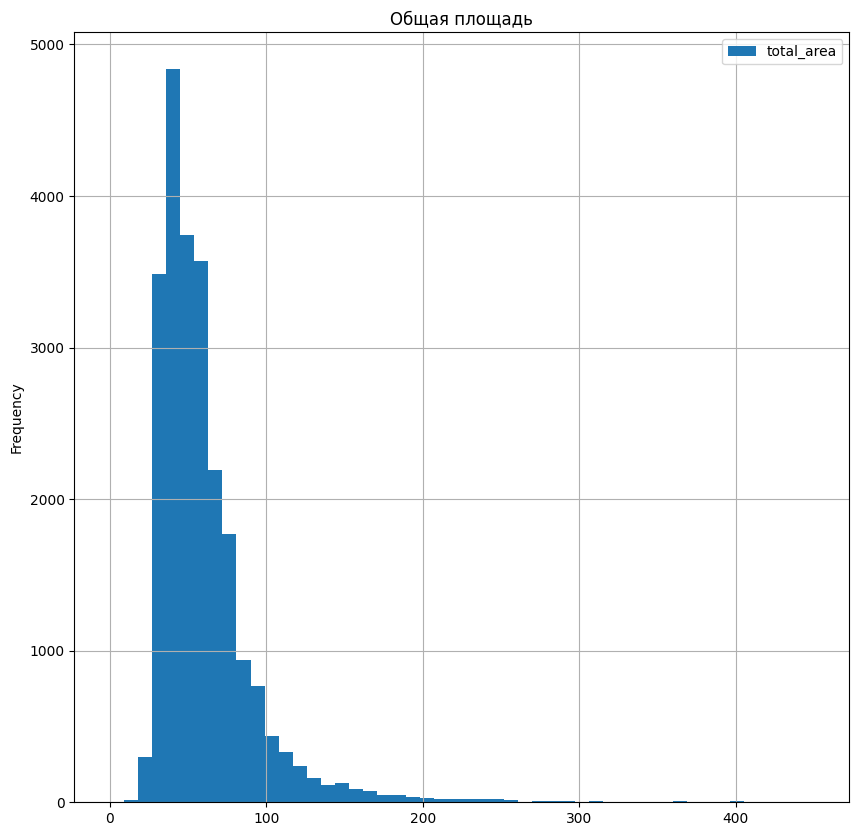

In [31]:
histo('total_area', 0, 450, 'Общая площадь')

Пиковое значение наблюдается у недвижимости площадью 40 кв.м. Судя по числовому описанию, минимальное значение площади 12 кв.м. Имеются выбросы в районе около 300-400 кв.м.

Построим диаграмму размаха

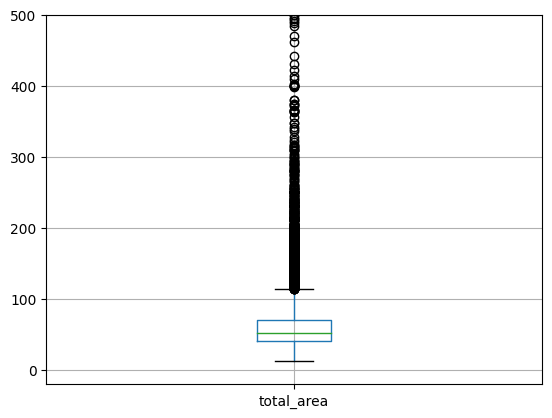

In [32]:
boxploto('total_area', -20, 500)

Подсчитаем процент потерянных данных

In [33]:
print('Процент потерянных данных:', outliers_counting('total_area', 'total_area <= 150'))

Процент потерянных данных: 2.38


Выбросы сливаются в жирную линию - их много. Избавимся от них.

In [34]:
data = data.query('total_area <= 150') # фильтруем по условию и сохраняем в исходную переменную

In [35]:
# Код ревьюера

low_percentele = 0.01
hihg_percentele = 0.99

last_price_low = data['last_price'].quantile(low_percentele)
last_price_high = data['last_price'].quantile(hihg_percentele)

print(f'Нижняя граница last_price {last_price_low}')
print(f'Верхняя граница last_price {last_price_high}')

print(
    'Процент отброшенных значений = ',
    round(
        100 - len(data.query('@last_price_low <= last_price <= @last_price_high'))
        / len(data['last_price']) * 100,
        2
    ),
    '%'
)

Нижняя граница last_price 1000000.0
Верхняя граница last_price 23289100.000000145
Процент отброшенных значений =  1.98 %


Теперь построим гистограмму для жилой площади

count    23002.000000
mean        32.246109
std         15.328663
min          2.000000
25%         18.200000
50%         30.000000
75%         41.900000
max        145.000000
Name: living_area, dtype: float64

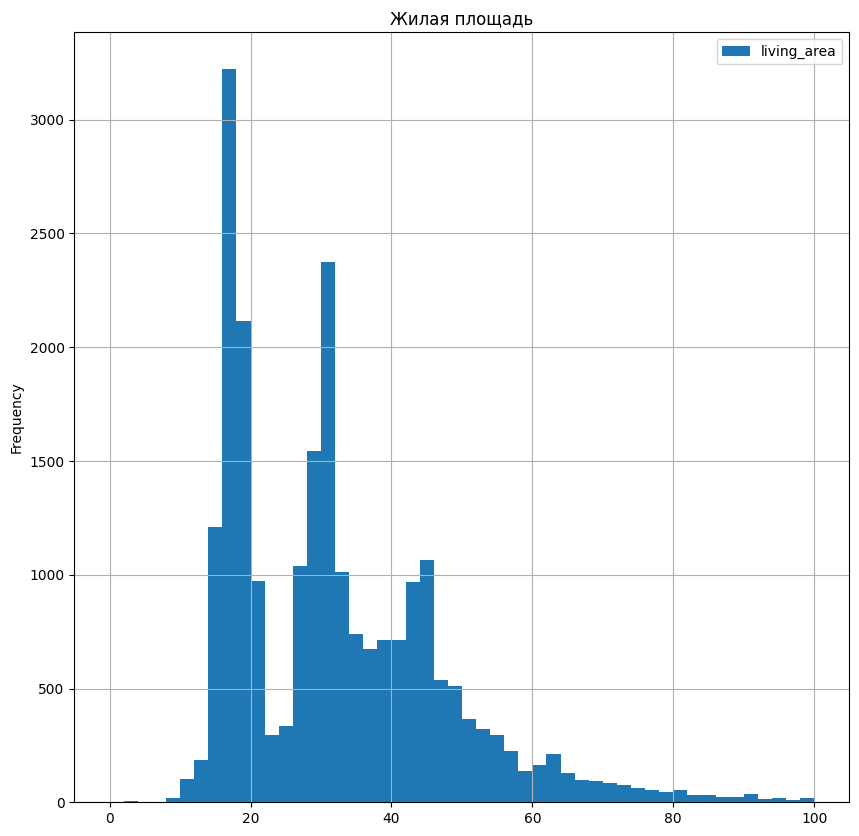

In [36]:
histo('living_area', 0, 100, 'Жилая площадь')

По графику видно 2 пика: 18 кв.м. и 30 кв.м, разделенные впадиной (22-23 кв.м.). Скорее всего, такая маленькая жилая площадь соответствует общей площади в 40 кв.м. и 60 кв.м.

Найдем выбросы

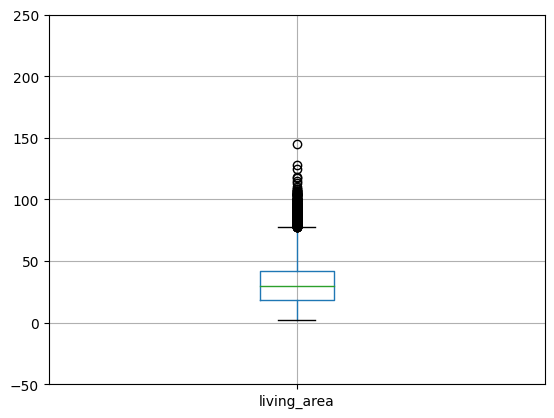

In [37]:
boxploto('living_area', -50, 250)

Минимальная жилая площадь в 2 кв.м. выглядит неправдоподобно, хотя и входит в "усы" ящика. Избавимся от выбросов

In [38]:
print('Процент потерянных данных:', outliers_counting('living_area', '10 <= living_area <= 100'))

Процент потерянных данных: 0.25


In [39]:
data = data.query('10 <= living_area <= 100')

Строим гистограмму для столбца `kitchen_area`

count    22944.000000
mean        10.083245
std          4.725653
min          1.300000
25%          7.200000
50%          9.100000
75%         11.000000
max         93.000000
Name: kitchen_area, dtype: float64

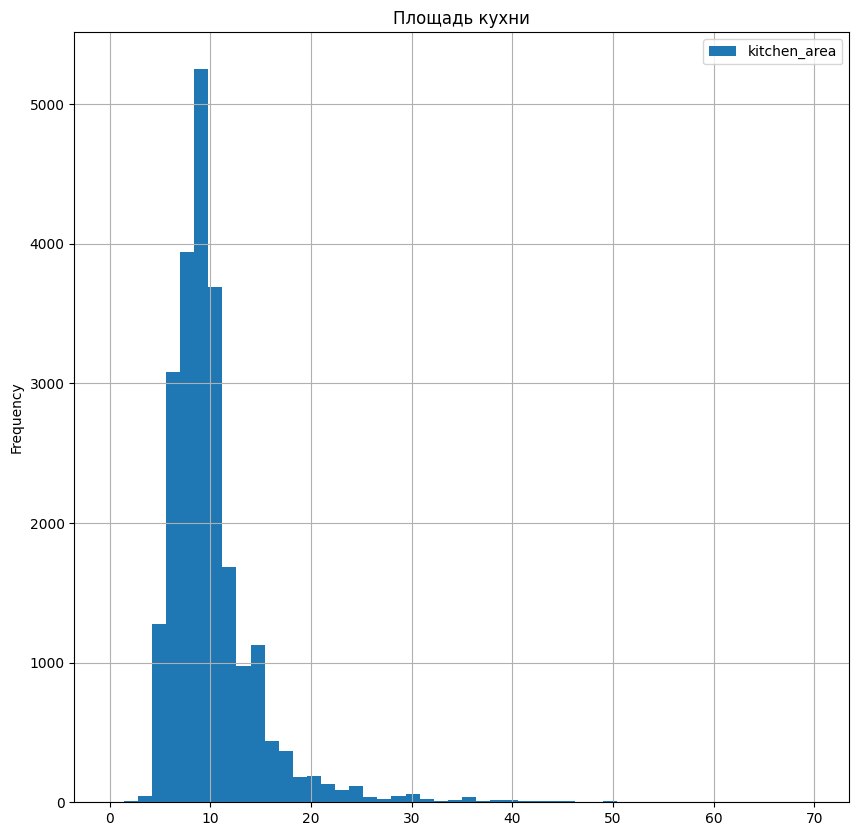

In [40]:
histo('kitchen_area', 0, 70, 'Площадь кухни')

Наблюдаем пик у 9 кв.м. Минимальное значение 1.3 кв.м. скорее всего ошибка в данных

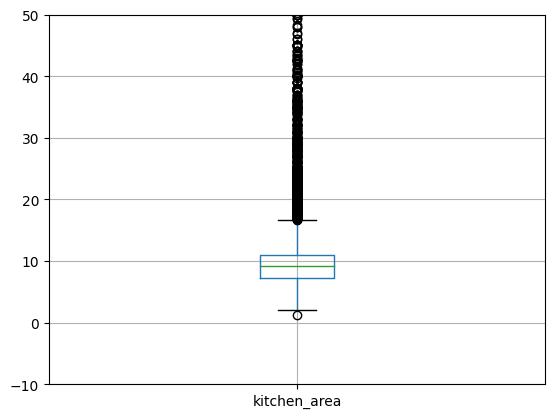

In [41]:
boxploto('kitchen_area', -10, 50)

Выбросами являются здесь значения выше 18 кв.м., медиана 9 кв.м. Удалим их

In [42]:
print('Процент потерянных данных:', outliers_counting('kitchen_area', '5 <= kitchen_area <= 40'))

Процент потерянных данных: 0.75


In [43]:
data = data.query('5 <= kitchen_area <= 40')

Теперь построим гистограмму для `last_price`

count    2.277300e+04
mean     5.634994e+06
std      4.298819e+06
min      4.300000e+05
25%      3.400000e+06
50%      4.575000e+06
75%      6.500000e+06
max      1.240000e+08
Name: last_price, dtype: float64

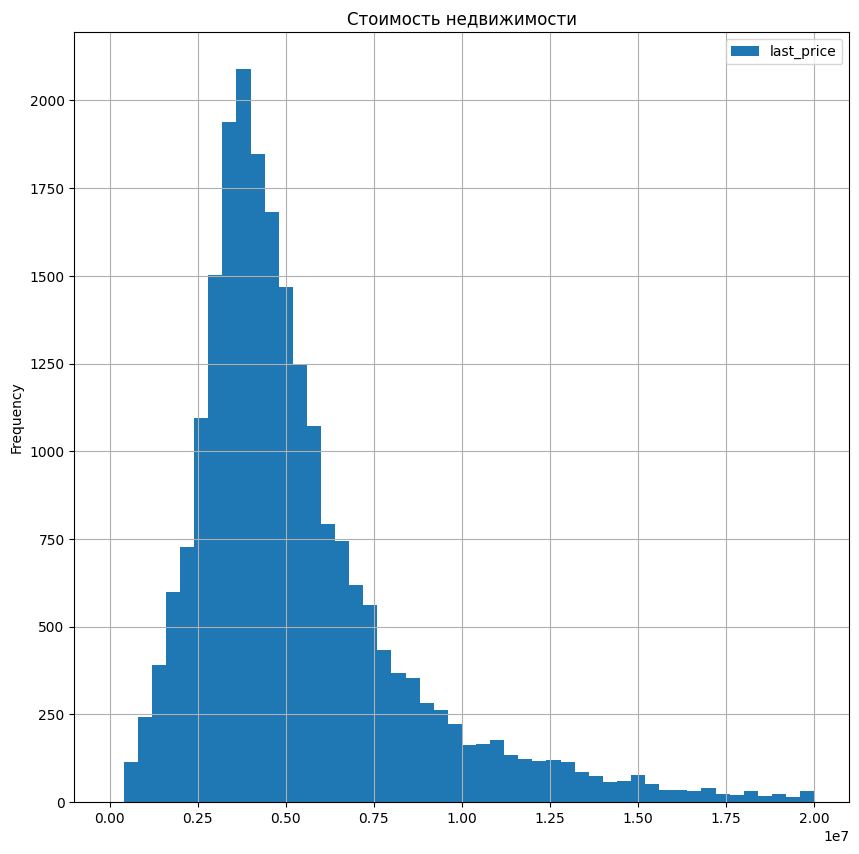

In [44]:
histo('last_price', 0, 20000000, 'Стоимость недвижимости')

Из графика видно нормальное распределение с хвостом в большую сторону. Пик приходится на 3.5 миллионов рублей

Построим диаграмму размаха

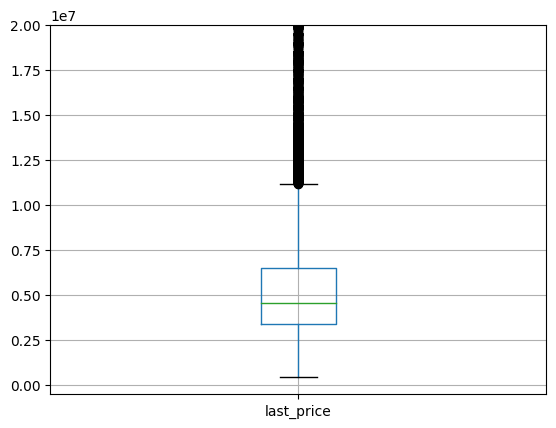

In [45]:
boxploto('last_price', -500000, 20000000)

Из диаграммы наблюдаем выбросы выше 11 миллионов рублей. Уберем их

In [46]:
print('Процент потерянных данных:', outliers_counting('last_price', 'last_price < 12000000'))

Процент потерянных данных: 5.94


In [47]:
data = data.query('last_price < 12000000')

Построим гистограмму для столбца `rooms`.

count    21420.000000
mean         1.932166
std          0.909932
min          0.000000
25%          1.000000
50%          2.000000
75%          3.000000
max          6.000000
Name: rooms, dtype: float64

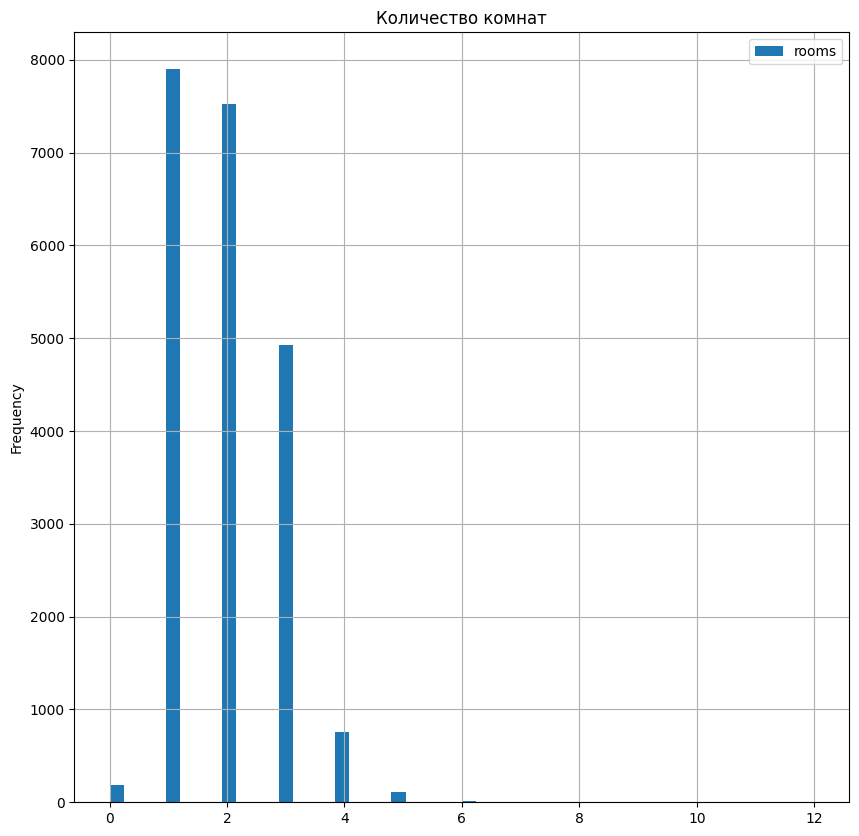

In [48]:
histo('rooms', 0, 12, 'Количество комнат')

Большинство квартир - 1, 2 и 3 комнаты. Но что же за квартиры такие с 0 комнат?
Проверим

In [49]:
data.query('is_studio == True and (rooms > 0 or rooms == 0)').head(10)

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,is_studio,is_open_plan,kitchen_area,balcony,locality_name,airports_nearest,city_centers_nearest,parks_around_3000m,parks_nearest,ponds_around_3000m,ponds_nearest,days_exposition,price_per_meter,weekday,month,year,floor_type,city_centers_nearest_km
144,1,2450000,27.00,2017-03-30,0,2.65,24,15.50,2,False,True,False,9.1,2,поселок Мурино,NaN,NaN,0,NaN,0,NaN,181.0,90740.74,3,3,2017,другой,NaN
440,8,2480000,27.11,2018-03-12,0,2.65,17,24.75,4,False,True,False,9.1,2,Санкт-Петербург,38171.0,15015.0,0,NaN,2,982.0,64.0,91479.16,0,3,2018,другой,15.0
608,2,1850000,25.00,2019-02-20,0,2.65,10,18.00,7,False,True,False,9.1,0,поселок Шушары,NaN,NaN,0,NaN,0,NaN,29.0,74000.00,2,2,2019,другой,NaN
697,12,2500000,24.10,2017-12-01,0,2.75,25,17.50,21,False,True,False,9.1,0,Кудрово,NaN,NaN,0,NaN,0,NaN,201.0,103734.44,4,12,2017,другой,NaN
716,5,1500000,17.00,2017-06-07,0,2.70,9,12.00,1,False,True,False,9.1,0,поселок Шушары,18654.0,29846.0,0,NaN,0,NaN,40.0,88235.29,2,6,2017,первый,30.0
1173,12,3240000,29.00,2018-10-30,0,2.65,24,17.00,2,False,True,False,9.1,2,Санкт-Петербург,35129.0,16293.0,0,NaN,1,475.0,13.0,111724.14,1,10,2018,другой,16.0
1174,3,3900000,32.00,2016-10-18,0,2.70,24,18.00,2,False,True,False,9.1,2,Санкт-Петербург,44754.0,8409.0,1,609.0,0,NaN,540.0,121875.00,1,10,2016,другой,8.0
1220,5,3300000,27.00,2017-11-10,0,2.80,17,20.00,16,False,True,False,9.1,0,Санкт-Петербург,12507.0,12419.0,0,NaN,1,528.0,113.0,122222.22,4,11,2017,другой,12.0
1260,0,2600000,27.00,2018-07-20,0,2.70,16,16.00,4,False,True,False,9.1,2,Кудрово,NaN,NaN,0,NaN,0,NaN,102.0,96296.30,4,7,2018,другой,NaN
1277,10,3150000,26.00,2017-07-14,0,2.75,21,17.38,11,False,True,False,9.1,0,Санкт-Петербург,48847.0,16685.0,0,NaN,0,NaN,622.0,121153.85,4,7,2017,другой,17.0


0 комнат соответствуют студиям: люди пишут либо 0 комнат, либо 1.

Построим гистограмму для высоты потолков

count    21420.000000
mean         2.699174
std          0.787060
min          1.200000
25%          2.600000
50%          2.650000
75%          2.700000
max         32.000000
Name: ceiling_height, dtype: float64

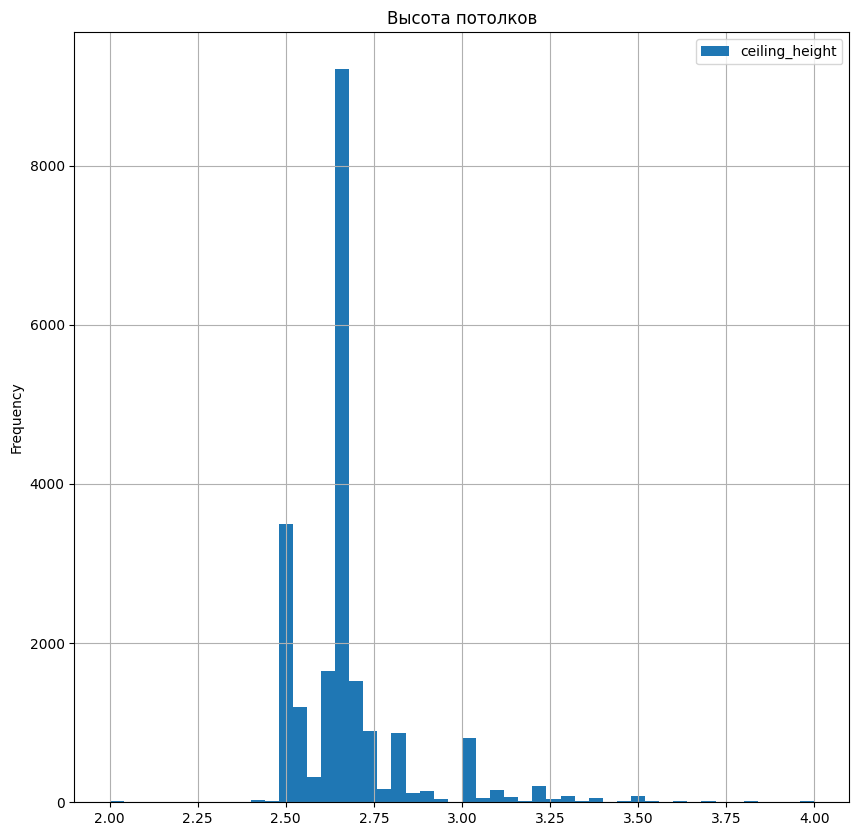

In [50]:
histo('ceiling_height', 2, 4, 'Высота потолков')

Пик приходится на высоту около 2.60 метров

Судя по максимальному значению, при записи данных произошла ошибка - возможно, если высота n больше 20 метров, то на самом деле это n / 10

In [51]:
data.query('ceiling_height >= 20').head(5)

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,is_studio,is_open_plan,kitchen_area,balcony,locality_name,airports_nearest,city_centers_nearest,parks_around_3000m,parks_nearest,ponds_around_3000m,ponds_nearest,days_exposition,price_per_meter,weekday,month,year,floor_type,city_centers_nearest_km
355,17,3600000,55.2,2018-07-12,2,25.0,5,32.0,2,False,False,False,9.1,2,Гатчина,NaN,NaN,0,NaN,0,NaN,259.0,65217.39,3,7,2018,другой,NaN
3148,14,2900000,75.0,2018-11-12,3,32.0,3,53.0,2,False,False,False,8.0,0,Волхов,NaN,NaN,0,NaN,0,NaN,NaN,38666.67,0,11,2018,другой,NaN
4643,0,4300000,45.0,2018-02-01,2,25.0,9,30.0,2,False,False,False,7.0,1,Санкт-Петербург,12016.0,13256.0,1,658.0,1,331.0,181.0,95555.56,3,2,2018,другой,13.0
4876,7,3000000,25.0,2017-09-27,0,27.0,25,17.0,17,False,False,True,9.1,2,поселок Мурино,NaN,NaN,0,NaN,0,NaN,28.0,120000.00,2,9,2017,другой,NaN
5076,0,3850000,30.5,2018-10-03,1,24.0,5,19.5,1,True,False,False,5.5,0,Санкт-Петербург,29686.0,8389.0,3,397.0,1,578.0,7.0,126229.51,2,10,2018,первый,8.0


Мы поставим простое условие: если высота потолка больше 20 метров, то мы делим его на 10

In [52]:
row = data['ceiling_height'] > 20
data.loc[row, 'ceiling_height'] /= 10

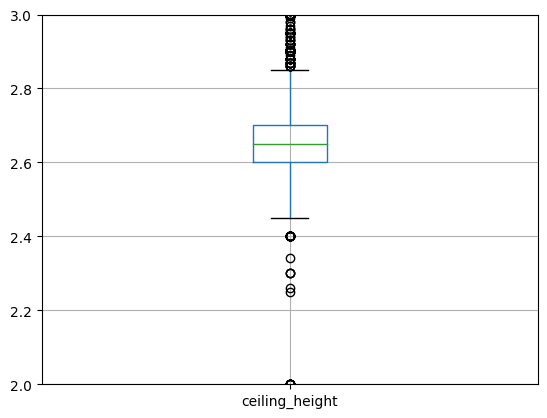

In [53]:
boxploto('ceiling_height', 2, 3)

In [54]:
print('Процент потерянных данных:', outliers_counting('ceiling_height', '2.4 < ceiling_height < 3.5'))

Процент потерянных данных: 1.14


In [55]:
data = data.query('2.4 < ceiling_height < 3.5')

Теперь опишем столбец `floor`.

count    21175.000000
mean         5.905785
std          4.906296
min          1.000000
25%          2.000000
50%          4.000000
75%          8.000000
max         33.000000
Name: floor, dtype: float64

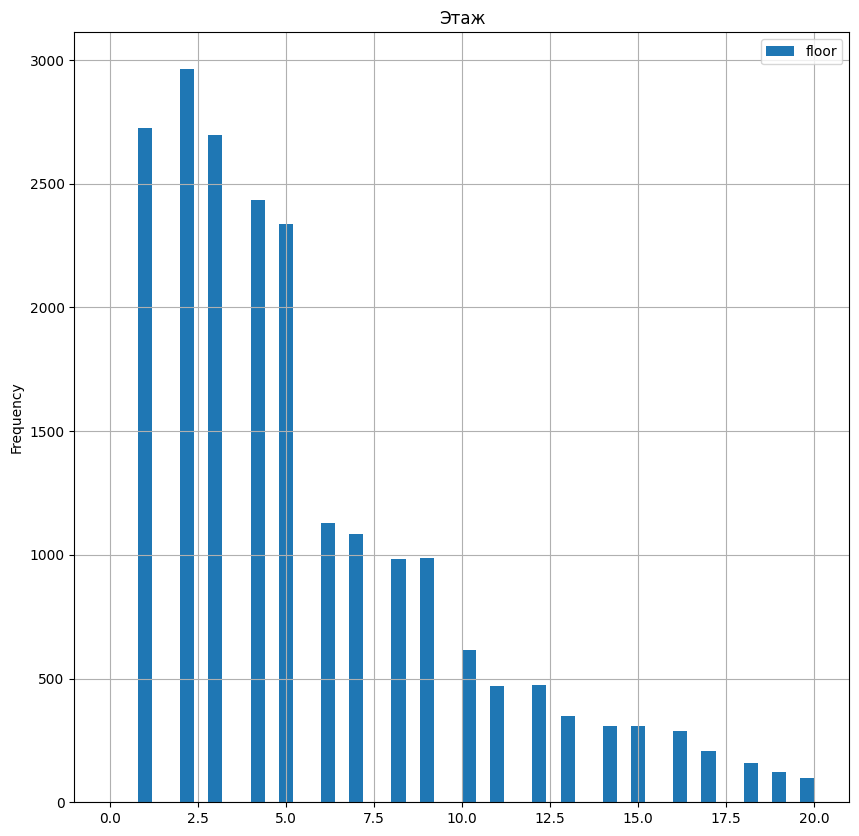

In [56]:
histo('floor', 0, 20, 'Этаж')

График похож на нормальное распределение. Большое количество квартир находятся на 1, 2 и 3 этажах

<Axes: xlabel='floor_type'>

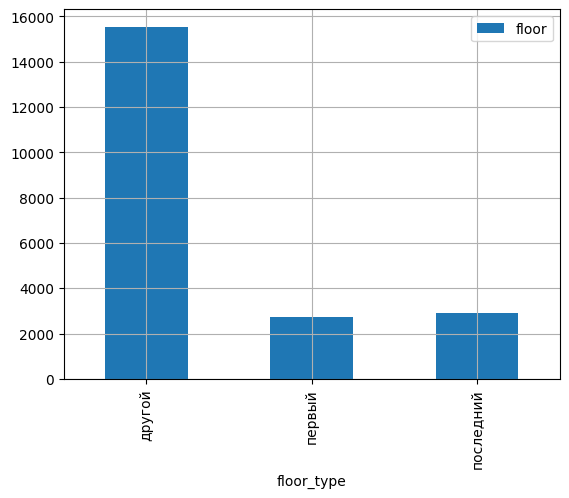

In [57]:
data.pivot_table(index='floor_type', values='floor', aggfunc='count').plot(kind='bar', y='floor', grid=True)

Очевидно, что большая часть квартир будет относиться к типу "другой", их у нас больше 11 тысяч, примерно равны квартиры с типами "первый" и "последний" - около 2 тысяч.

count    21175.000000
mean        10.835986
std          6.635938
min          1.000000
25%          5.000000
50%          9.000000
75%         16.000000
max         60.000000
Name: floors_total, dtype: float64

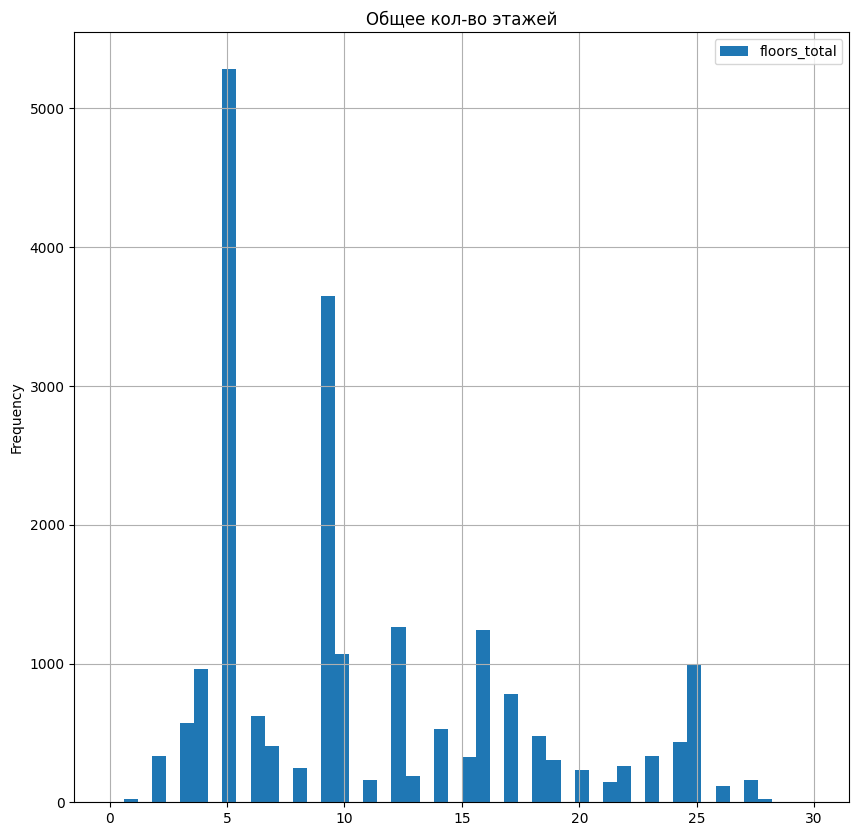

In [58]:
histo('floors_total', 0, 30, 'Общее кол-во этажей')

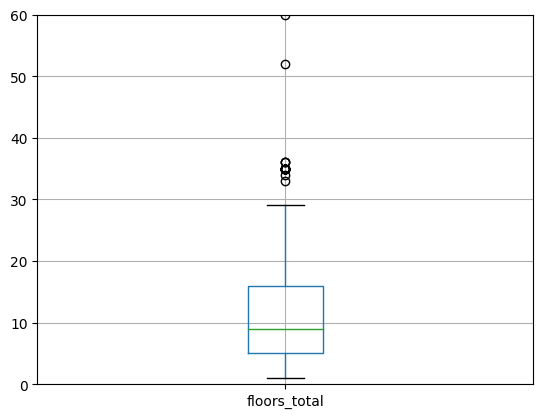

In [59]:
boxploto('floors_total', 0, 60)

In [60]:
print('Процент потерянных данных:', outliers_counting('floors_total', 'floors_total <= 30'))

Процент потерянных данных: 0.15


In [61]:
data = data.query('floors_total <= 30')

Больше всего 5-этажек и 8-этажек. Судя по опыту, это соответствует действительности

count    15752.000000
mean     15023.514093
std       8473.600268
min        287.000000
25%      10679.000000
50%      13650.000000
75%      16689.000000
max      65968.000000
Name: city_centers_nearest, dtype: float64

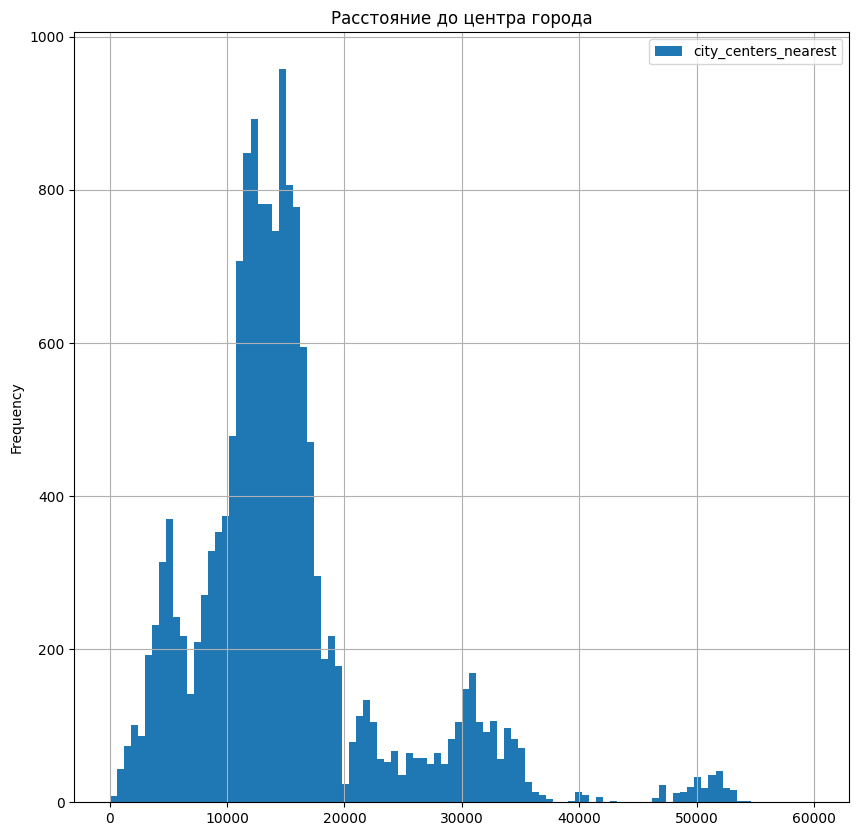

In [62]:
histo('city_centers_nearest', 0, 60000, 'Расстояние до центра города', hbins=100)

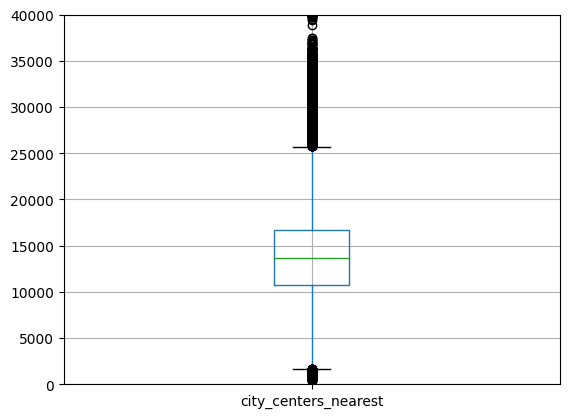

In [63]:
boxploto('city_centers_nearest', 0, 40000)

Пик находится на значении 12-13 км. Есть выбросы в районе от 0 до 2500 и от 26000 и выше. Уберем их.

In [64]:
print('Процент потерянных данных:', outliers_counting('city_centers_nearest', '2000 <= city_centers_nearest <= 26000 or city_centers_nearest.isna()'))

Процент потерянных данных: 11.86


In [65]:
data = data.query('(2000 <= city_centers_nearest <= 26000) or city_centers_nearest.isna()')

count    13872.000000
mean     28531.076269
std      12559.107431
min          0.000000
25%      17393.000000
50%      27762.500000
75%      37499.000000
max      61748.000000
Name: airports_nearest, dtype: float64

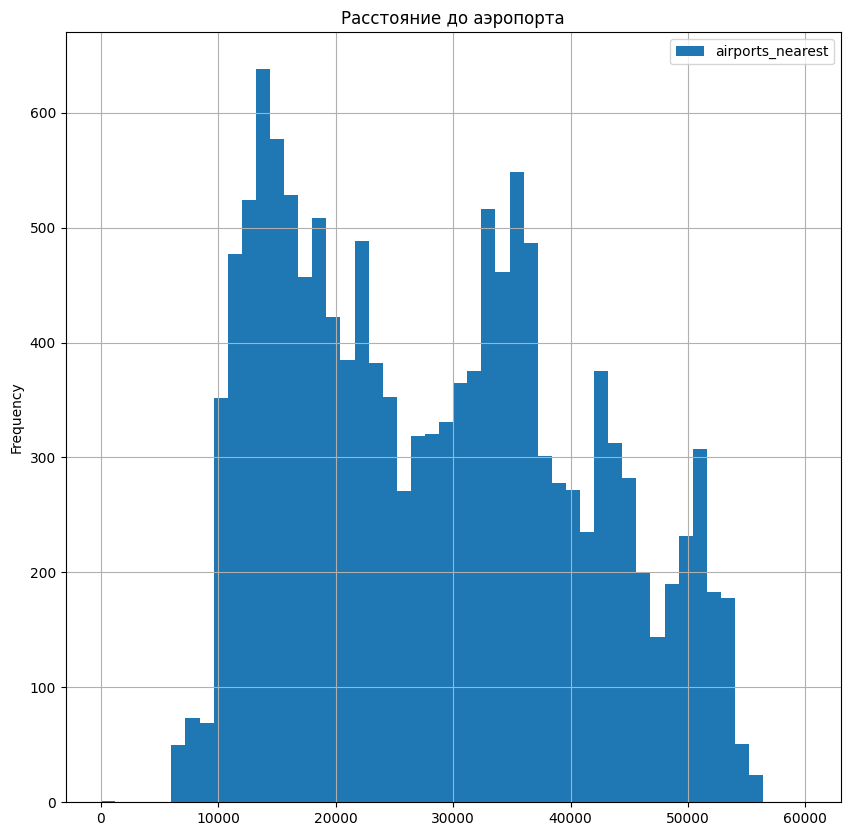

In [66]:
histo('airports_nearest', 0, 60000, 'Расстояние до аэропорта')

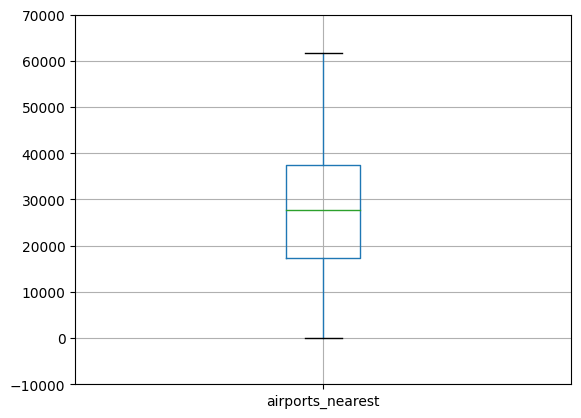

In [67]:
boxploto('airports_nearest',-10000, 70000)

Пики гистограммы у значений 13 км и 35 км. Выбросов нет.

count    5734.000000
mean      501.065923
std       334.481090
min         1.000000
25%       303.000000
50%       466.500000
75%       624.000000
max      3190.000000
Name: parks_nearest, dtype: float64

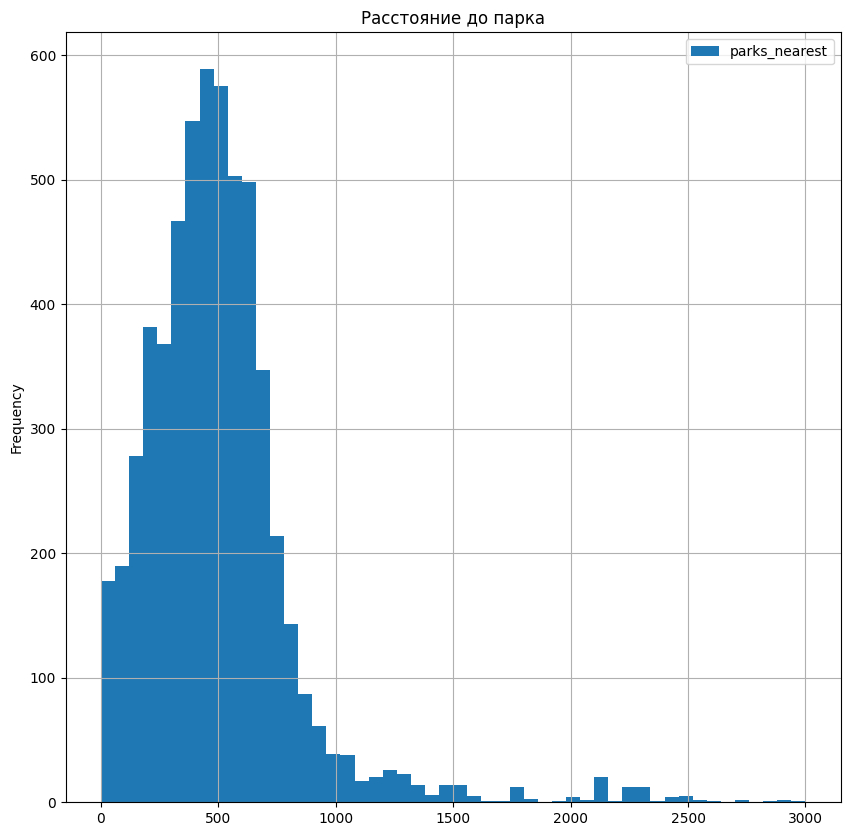

In [68]:
histo('parks_nearest', 0, 3000, 'Расстояние до парка')

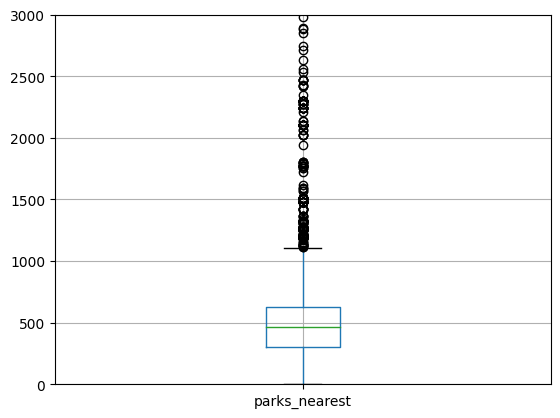

In [69]:
boxploto('parks_nearest', 0, 3000)

Пик графика на 400-500 м. Выбросы начинаются после 1200 м

In [70]:
print('Процент потерянных данных:', outliers_counting('parks_nearest', 'parks_nearest < 1200 or parks_nearest.isna()'))

Процент потерянных данных: 3.37


In [71]:
data = data.query('parks_nearest < 1200 or parks_nearest.isna()')

count    19083.000000
mean         2.572027
std          1.793555
min          0.000000
25%          1.000000
50%          3.000000
75%          4.000000
max          6.000000
Name: weekday, dtype: float64

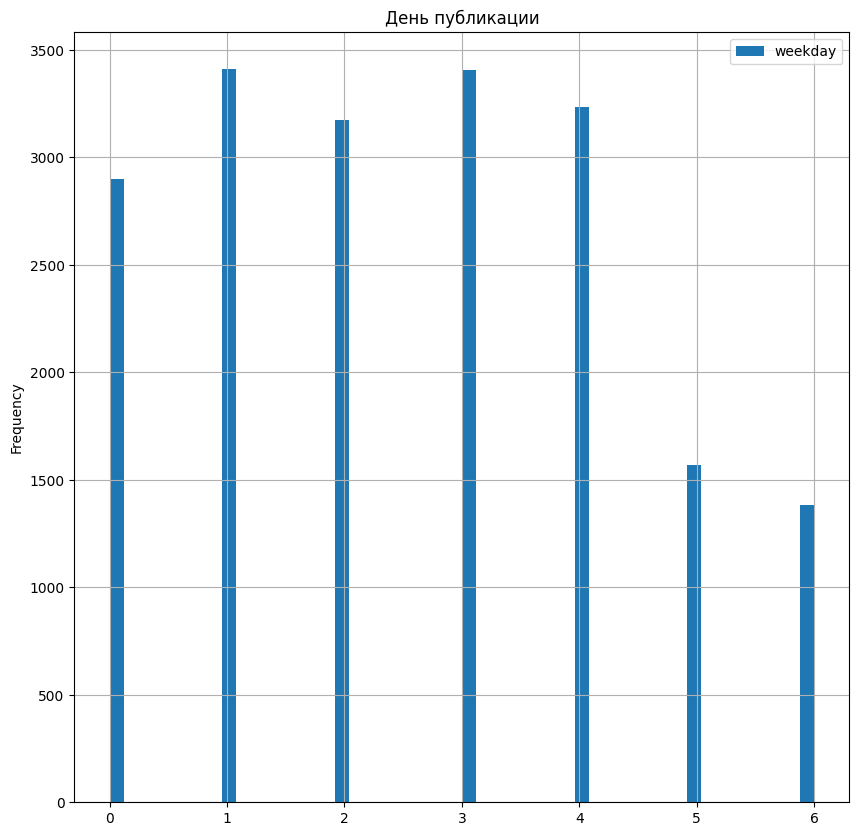

In [72]:
histo('weekday', 0, 6, 'День публикации')

Как видим, больше всего публикаций пришлось на вторник и четверг

count    19083.000000
mean         6.410051
std          3.486617
min          1.000000
25%          3.000000
50%          6.000000
75%         10.000000
max         12.000000
Name: month, dtype: float64

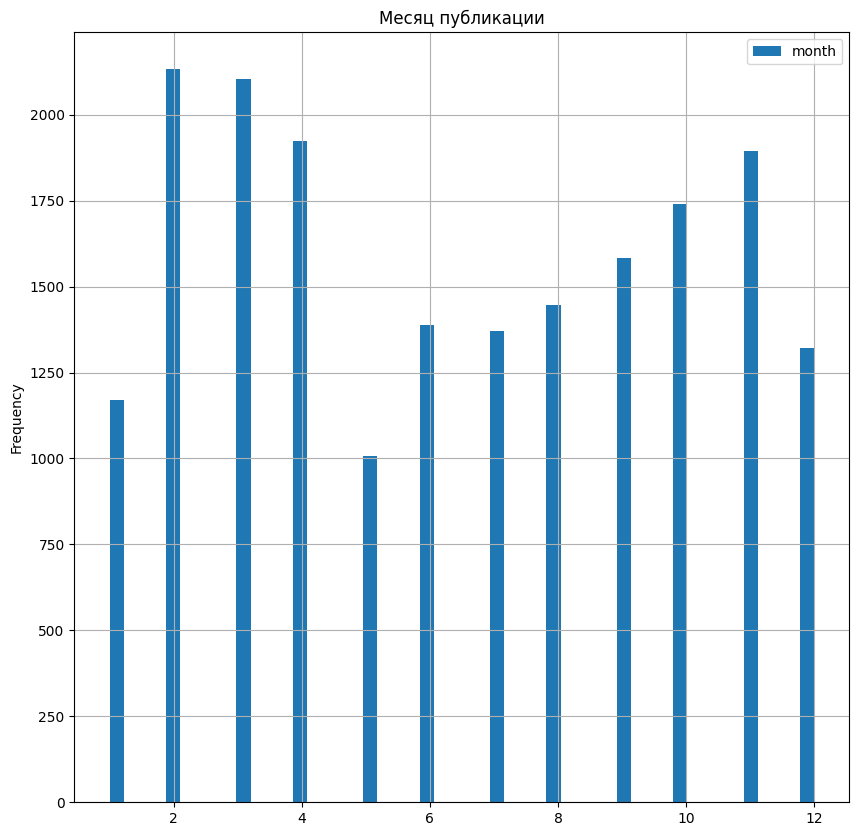

In [73]:
histo('month', 1, 12, 'Месяц публикации')

Самыми популярными месяцами оказались март, апрель и ноябрь

### Задания

**Изучите, как быстро продавались квартиры (столбец days_exposition). Этот параметр показывает, сколько дней «висело» каждое объявление.**

Построим гистограмму для столбца `days_exposition`

count    16743.000000
mean       170.067670
std        208.850657
min          1.000000
25%         43.000000
50%         90.000000
75%        214.000000
max       1580.000000
Name: days_exposition, dtype: float64

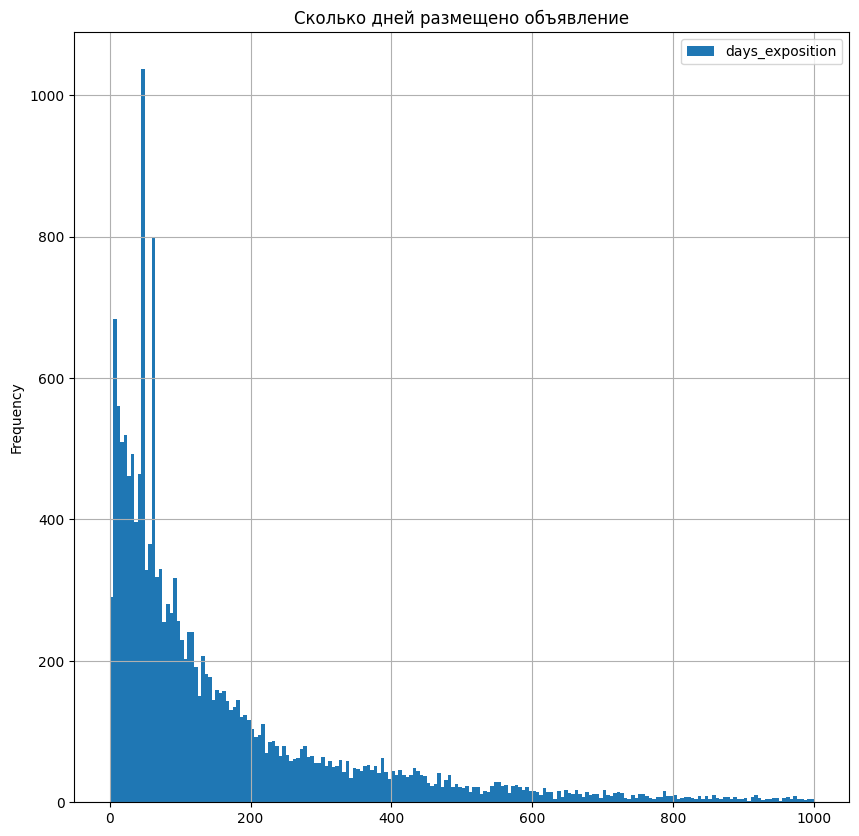

In [74]:
histo('days_exposition', 0, 1000, 'Сколько дней размещено объявление', hbins=200)

count    16743.000000
mean       170.067670
std        208.850657
min          1.000000
25%         43.000000
50%         90.000000
75%        214.000000
max       1580.000000
Name: days_exposition, dtype: float64

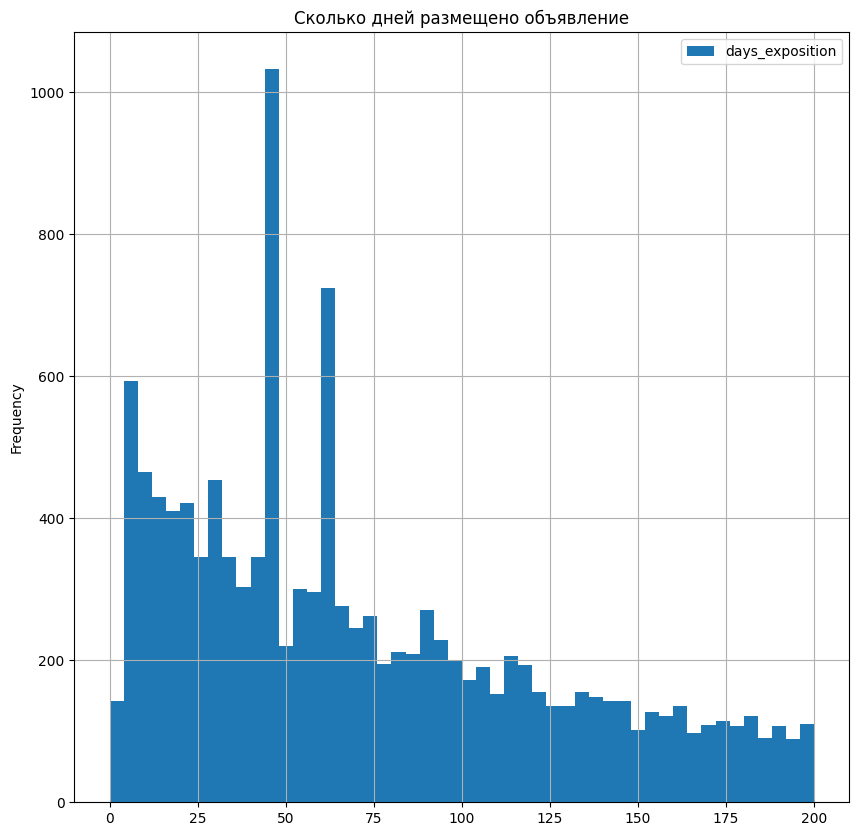

In [75]:
histo('days_exposition', 0, 200, 'Сколько дней размещено объявление', hbins=50)

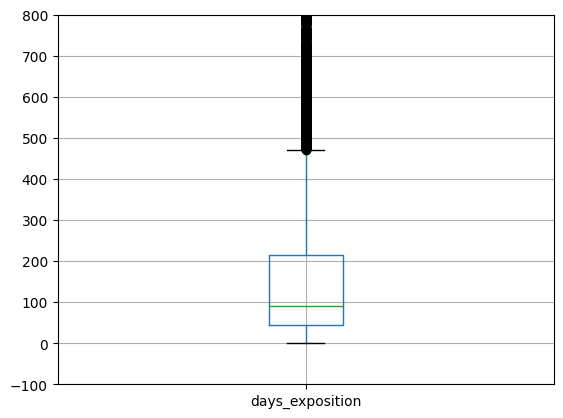

In [76]:
boxploto('days_exposition', -100, 800)

Из числового описания данных видна огромная разница между медианой и средним значением: 90 и 170 дней соответственно. Среднее значение слишком чувствительно к выбросам - здесь они начинаются с ~480 дней.

Слишком быстрыми объявлениями можно считать те, которые меньше первого квартиля (меньше 43 дней), а слишком долгие - те, что больше третьего квартиля (больше 213 дней).

Уберем из таблицы выбросы

In [77]:
print('Процент потерянных данных:', outliers_counting('days_exposition', 'days_exposition < 500'))

Процент потерянных данных: 7.6


In [78]:
data = data.query('days_exposition < 500')

In [79]:
data['days_exposition'].describe()

count    15471.000000
mean       122.493439
std        117.069095
min          1.000000
25%         39.000000
50%         78.000000
75%        173.000000
max        499.000000
Name: days_exposition, dtype: float64

**Какие факторы больше всего влияют на общую (полную) стоимость объекта? Постройте графики, которые покажут зависимость цены от указанных ниже параметров.**
  - общей площади;
  - жилой площади;
  - площади кухни;
  - количество комнат;
  - типа этажа, на котором расположена квартира (первый, последний, другой);
  - даты размещения (день недели, месяц, год);

Напишем функции для вывода диаграмм. Сначала в ней создается сводная таблица с медианой, а затем применяется `plot()`

In [80]:
def draw_chart(array):
    for i in array:
        pivot = data.pivot_table(index=i, values='last_price', aggfunc='median')
        pivot.plot(y='last_price', style='o-', figsize=(8, 6), grid=True)

Корреляция: 0.7006617944991664


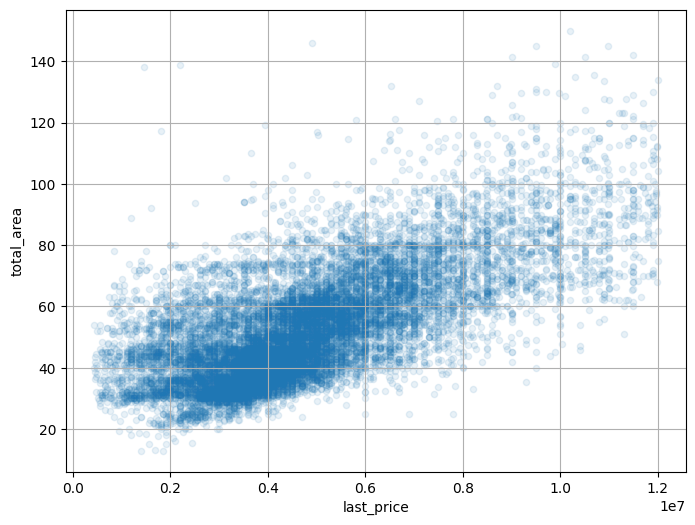

In [81]:
data.plot(x='last_price', y='total_area', kind='scatter', figsize=(8, 6), grid=True, alpha=0.1)
print('Корреляция:', data['total_area'].corr(data['last_price']))

Как видим, корреляция между стоимостью объекта и его общей площадью есть. Оно и логично: стоимость недвижимости растет за каждый квадратный метр.

Корреляция: 0.5543823774778189


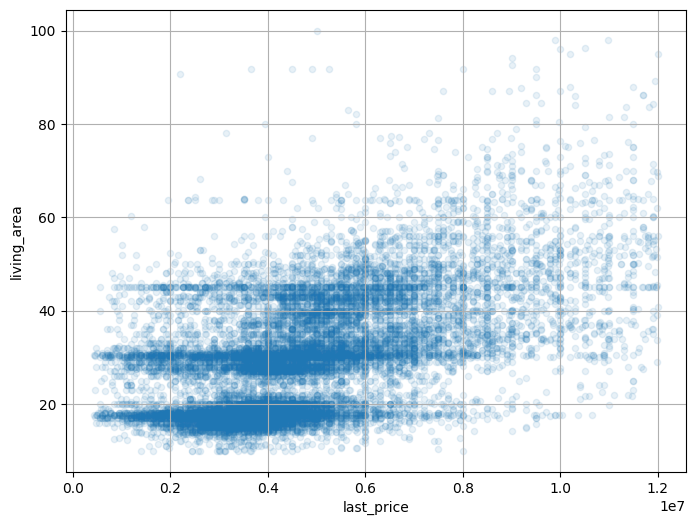

In [82]:
data.plot(x='last_price', y='living_area', kind='scatter', figsize=(8, 6), grid=True, alpha=0.1)
print('Корреляция:', data['living_area'].corr(data['last_price']))

Здесь тоже можно заметить небольшую корреляцию. Ведь чем больше жилая площадь, тем больше общая, и, соответственно, больше стоимость объекта

Корреляция: 0.45876327522003557


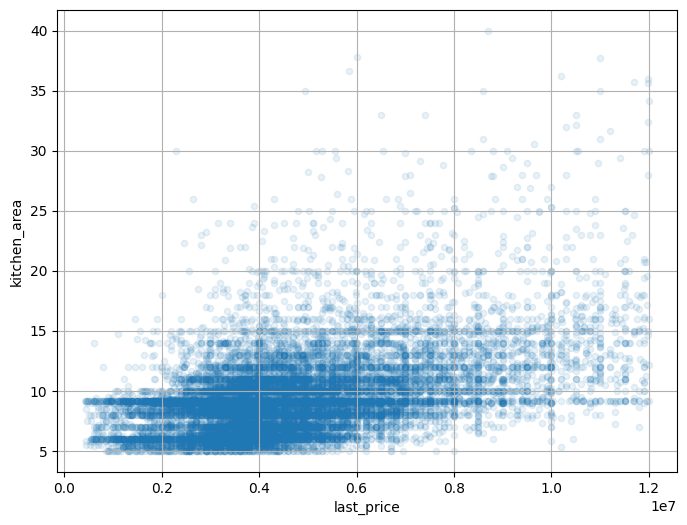

In [83]:
data.plot(x='last_price', y='kitchen_area', kind='scatter', figsize=(8, 6), grid=True, alpha=0.1)
print('Корреляция:', data['kitchen_area'].corr(data['last_price']))

Здесь уже корреляция не такая выраженная, как на первом. По логике, чем больше кухня, тем меньше жилая площадь, но корреляция все-таки присутствует, что говорит о связи "большая кухня - большая квартира" и соответственно большая стоимость.

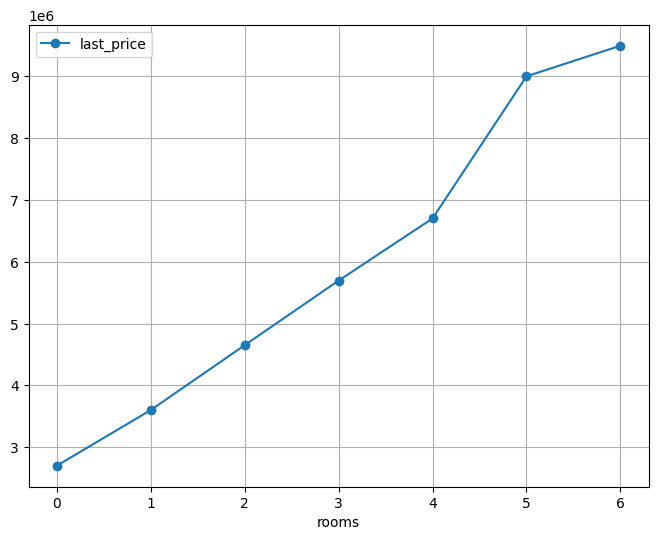

In [84]:
draw_chart(['rooms'])

Корреляция между количеством комнат и ценой объекта положительна. Чем больше комнат, тем, скорее всего, больше и общая площадь

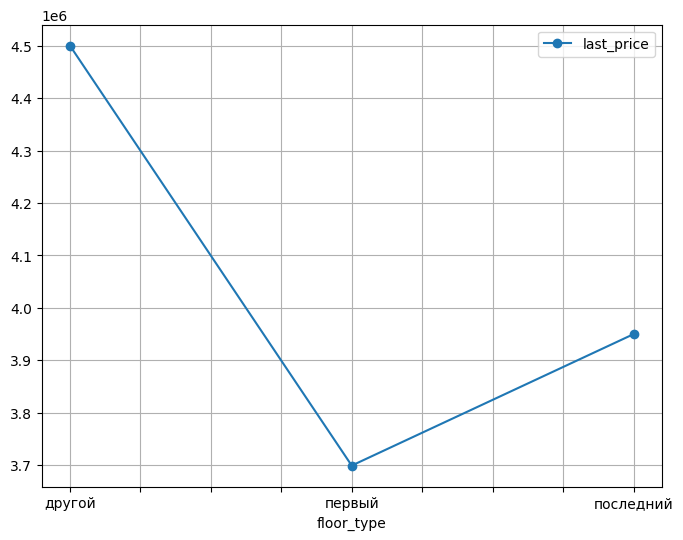

In [85]:
draw_chart(['floor_type'])

Самая маленькая медиана оказалась тут у первого этажа, самая высокая - у других этажей. Последний этаж стоит в районе 4 млн рублей, возможно, все дело в трудной доступности, особенно если нет лифта. Что касается первого этажа - скорее дело в шуме и грызунах, поэтому цена низкая.

Корреляция weekday: -0.009566233660965155
Корреляция month: 0.005863398375125277
Корреляция year: 0.01286552467850729


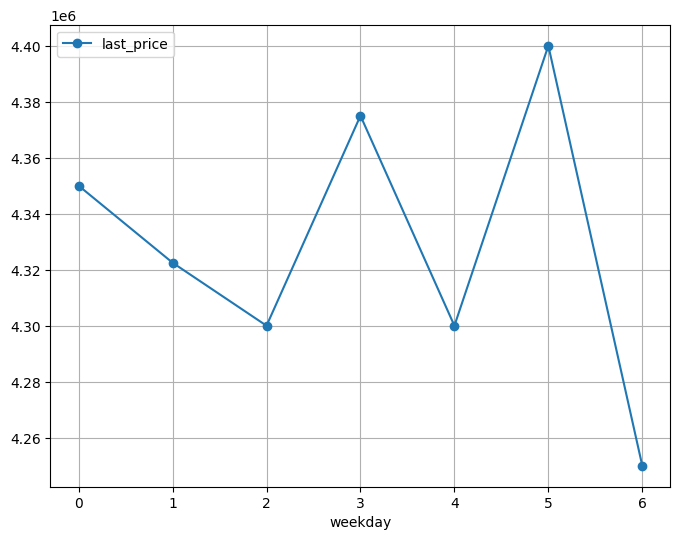

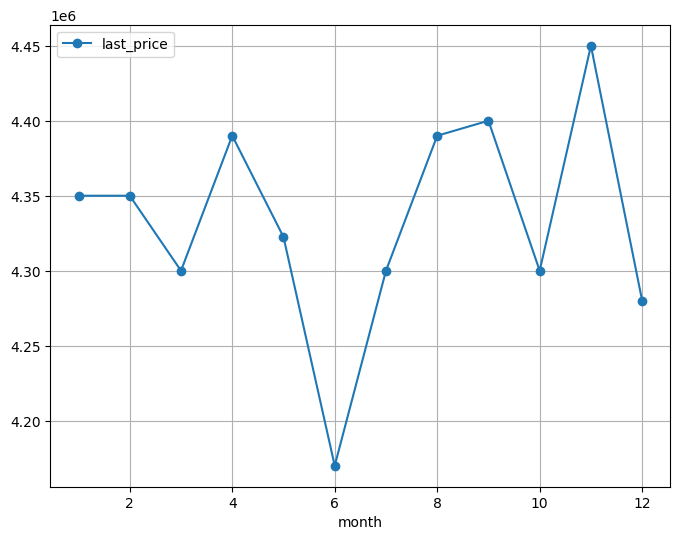

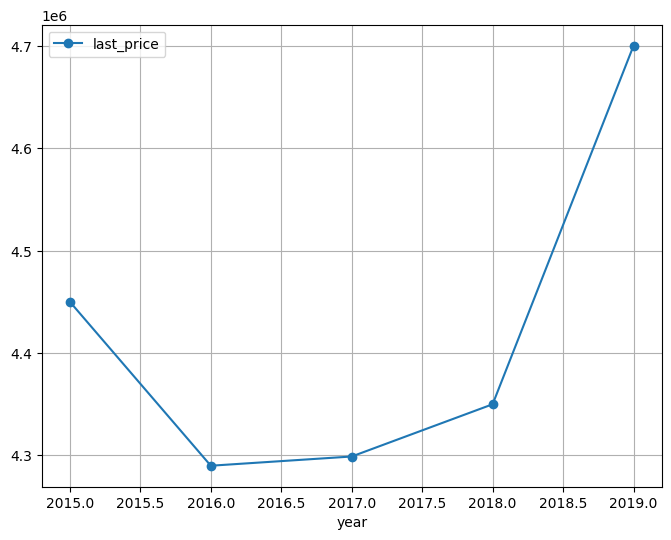

In [86]:
draw_chart(['weekday', 'month', 'year'])
for i in ['weekday', 'month', 'year']:
    print(f'Корреляция {i}:', data[i].corr(data['last_price']))

Что касается графиков `weekday`, `month` и `year` - корреляция стремится к нулю. Зависимости нет

Если обратить внимание на график `year` можно заметить, что медиана стоимости квартир с 2017 года по 2019 поднялась на 4 млн рублей


Итог: больше всего на стоимость недвижимости влияет общая площадь (и жилая площадь соответственно), количество комнат, тип этажа (этажи, помимо первого и последнего, оценивают в большую сумму).

**Посчитайте среднюю цену одного квадратного метра в 10 населённых пунктах с наибольшим числом объявлений. Выделите населённые пункты с самой высокой и низкой стоимостью квадратного метра.**

Выведем населенные пункты по убыванию количества объявлений

In [87]:
data['locality_name'].value_counts().head(10)

locality_name
Санкт-Петербург            10702
поселок Мурино               507
Кудрово                      400
Всеволожск                   303
поселок Парголово            286
Гатчина                      240
поселок Шушары               222
Выборг                       185
деревня Новое Девяткино      114
Сертолово                    108
Name: count, dtype: int64

Построим сводную таблицу

In [88]:
locality_price_per_meter = data.pivot_table(index='locality_name', values='price_per_meter', aggfunc=['mean', 'median'])
locality_price_per_meter.columns = ['Среднее значение', 'Медиана']
locality_price_per_meter.sort_values(by='Среднее значение', ascending=False).head(10)

,Среднее значение,Медиана
locality_name,,
Кронштадт,111470.590000,111470.590
Санкт-Петербург,104022.793739,100726.610
поселок Левашово,96997.690000,96997.690
деревня Мистолово,96157.153333,90229.890
Пушкин,94809.809767,95108.700
Кудрово,94444.180650,94879.030
поселок Парголово,89360.980594,91289.205
поселок Стрельна,88201.750000,87323.350
Ломоносов,87804.880000,87804.880


Построим столбчатую диаграмму по среднему значению цены за кв.м., заодно сравним с медианой.

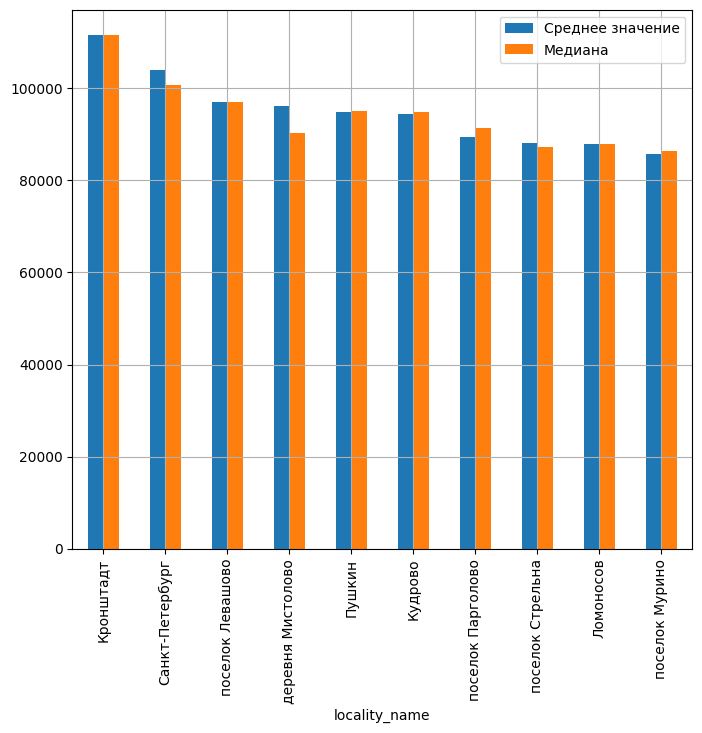

In [89]:
locality_price_per_meter.sort_values(by='Среднее значение', ascending=False).head(10).plot(kind='bar', figsize=(8, 7), grid=True);

Можно заметить, что среднее значение не сильно отличается от медианы.

Самые высокие цены за квадратный метр оказались у города-порта Кронштадта и Санкт-Петербурга, затем у поселка Левашово, самые низкие в десятке - Ломоносов и поселок Мурино - около 86 тыс. рублей за кв.м.

Выделим недвижимость в Санкт-Петербурге:

In [90]:
real_estate_center = data.query('locality_name == "Санкт-Петербург" and (not city_centers_nearest.isna())').reset_index(drop=True)
real_estate_center

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,is_studio,is_open_plan,kitchen_area,balcony,locality_name,airports_nearest,city_centers_nearest,parks_around_3000m,parks_nearest,ponds_around_3000m,ponds_nearest,days_exposition,price_per_meter,weekday,month,year,floor_type,city_centers_nearest_km
0,18,5400000,61.0,2017-02-26,3,2.50,9,43.6,7,False,False,False,6.5,2,Санкт-Петербург,50898.0,15008.0,0,NaN,0,NaN,289.0,88524.59,6,2,2017,другой,15.0
1,5,5050000,39.6,2017-11-16,1,2.67,12,20.3,3,False,False,False,8.5,0,Санкт-Петербург,38357.0,13878.0,1,310.0,2,553.0,137.0,127525.25,3,11,2017,другой,14.0
2,16,4650000,39.0,2017-11-18,1,2.65,14,20.5,5,False,False,False,7.6,1,Санкт-Петербург,12900.0,14259.0,1,590.0,1,296.0,19.0,119230.77,5,11,2017,другой,14.0
3,11,6700000,82.0,2017-11-23,3,3.05,5,55.6,1,False,False,False,9.0,0,Санкт-Петербург,22108.0,10698.0,3,420.0,0,NaN,397.0,81707.32,3,11,2017,первый,11.0
4,8,3250000,31.0,2017-01-27,1,2.50,5,19.4,2,False,False,False,5.6,1,Санкт-Петербург,44060.0,10842.0,1,759.0,0,NaN,168.0,104838.71,4,1,2017,другой,11.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10680,8,3300000,31.0,2017-04-29,1,2.55,9,18.0,6,False,False,False,6.5,0,Санкт-Петербург,11751.0,11602.0,1,140.0,1,317.0,193.0,106451.61,5,4,2017,другой,12.0
10681,6,3200000,39.0,2017-12-16,1,2.65,9,20.0,6,False,False,False,11.0,2,Санкт-Петербург,40837.0,16704.0,0,NaN,0,NaN,38.0,82051.28,5,12,2017,другой,17.0
10682,19,9200000,101.0,2019-04-01,3,3.05,15,63.0,12,False,False,False,15.0,0,Санкт-Петербург,15632.0,14428.0,0,NaN,0,NaN,23.0,91089.11,0,4,2019,другой,14.0
10683,13,3550000,35.3,2018-02-28,1,2.86,15,16.3,4,False,False,False,9.1,2,Санкт-Петербург,17284.0,16081.0,1,353.0,2,652.0,29.0,100566.57,2,2,2018,другой,16.0


Выведем график зависимости цен от расстояния до центра города

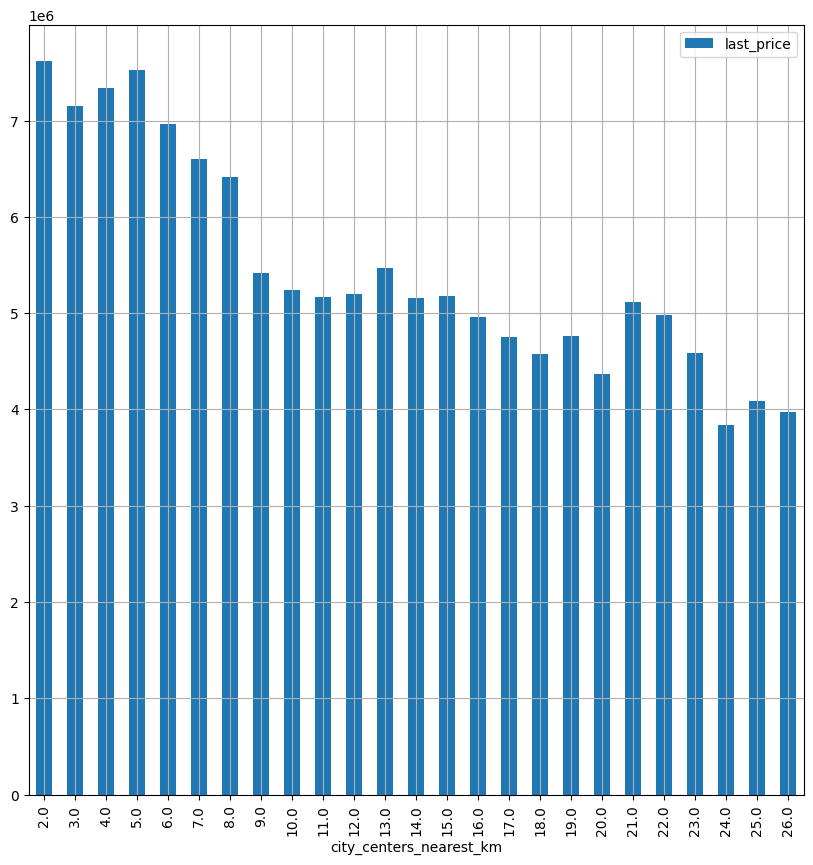

In [91]:
real_estate_center.pivot_table(index='city_centers_nearest_km', values='last_price', aggfunc='mean').plot(kind='bar', y='last_price', grid=True, figsize=(10, 10));

Очевидно, что чем ближе квартира к центру Санкт-Петербурга, тем больше она будет стоить, что и подтверждает график. Самые высокие цены у квартир в 2-6 км от центра, самые низкие - 24-26 км от центра. Начиная с 9 км цена сильно падает

## Общий вывод

**Подведем итоги по исследуемой работе:**

В первом пункте:
1. Прочитали файл и изучили данные в нем;
2. Построили гистограммы для каждого столбца

Во втором пункте:
1. Определили пропущенные значения и заполнили их, изменили типы данных в тех столбцах, где это было необходимо;
2. Устранили неявные дубликаты в столбе `locality name`;
3. Устранили аномалии во всех столбцах;

В третьем пункте:

Добавили в таблицу следующие столбцы: `цена одного квадратного метра`, `день публикации объявления`, `месяц публикации объявления`, `год публикации объявления`, `тип этажа квартиры`, ` расстояние в км до центра города`

В четвертом пункте:
1. Изучили и описали параметры:
  - общая площадь;
  - жилая площадь;
  - площадь кухни;
  - цена объекта;
  - количество комнат;
  - высота потолков;
  - этаж квартиры;
  - тип этажа квартиры («первый», «последний», «другой»);
  - общее количество этажей в доме;
  - расстояние до центра города в метрах;
  - расстояние до ближайшего аэропорта;
  - расстояние до ближайшего парка;
  - день и месяц публикации объявления
2. Построили для каждого гистограмму;
3. Изучили как быстро продавались квартиры на основе данных из столбца `days_exposition`;
4. Выполнили все 4 поставленные задачи, используя графики и сводные таблицы.

**Выводы:**
- От дня размещения до дня снятия объявления обычно проходит 90-120 дней;
- На стоимость объекта больше всего влияют общая площадь, количество комнат и тип этажа;
- Самые высокие цены на кв.м. из топ-10 в Кронштадте и Санкт-Петербурге, самые низкие в поселке Мурино;
- Чем дальше объект от центра, тем ниже его стоимость. Самые высокие цены приходятся на квартиры в 2-5 км от центра.